In [1]:
import pickle
import numpy as np
import gym
import matplotlib.pyplot as plt
from gym import TimeLimit
from itertools import product
import json
import pandas as pd

from gym.envs.classic_control import MountainCarEnv
from typing import List, Optional
from contextlib import closing
from io import StringIO
from os import path
from typing import List, Optional

import numpy as np

#import gymnasium as gym
#from gymnasium import Env, spaces, utils
#from gymnasium.envs.toy_text.utils import categorical_sample
#from gymnasium.error import DependencyNotInstalled
#from gymnasium.utils import seeding



import gym
from gym import spaces
from gym.envs.classic_control import utils
from gym.error import DependencyNotInstalled


import seaborn as sns

# Functon difinitions

## 1. Function Definition Evaluation charts : Q Learning

In [1488]:


# base configuration

grid = {

'gamma' : [0.01,0.3,0.7,0.9,0.95,0.99],#1],
'init_alpha' : [ 0.95,0.9,0.7,0.4 ],
'init_epsilon' : [ 1,0.95,0.9,0.7,0.4 ]
    
}

algo_iter =  'RL_iter'
algo = 'QL'
env_name = 'FL'
size_ = 4
score_ = 'steps'
steps_ = 'time'
time_ = 'score'



# function to create base charts


def create_q_evaluation_charts(grid
                              
                              
                                    ,algo_iter =  'RL_iter'
                                    ,algo = 'QL'
                                    ,env_name = 'FL'
                                    ,size_ = 4
                                    ,score_ = 'steps'
                                    ,steps_ = 'time'
                                    ,time_ = 'score'
                                    ,misc=''

                                    ,save_folder='model_bests_'
                                   ,    selected = 'V_mean' #score

                                  ):


    size = str(size_)

    base_addr = "./ADA/"+env_name+"/"+algo_iter

    mid_addr = algo+"_"+env_name

    selected__ = 'QL_MC_size_25_gamma_0.99_alpha_0.95_eps_1'

    

    
    
    
    df_r = pd.DataFrame(
    [

    {'size':size_,


        'gamma':i,'init_alpha':j,'init_epsilon':k,
        'steps':pd.read_pickle(


                base_addr+"/evaluation/"+steps_+"/"+mid_addr+"_size_"+size+"_gamma_"+str(i)+"_alpha_"+str(j)+"_eps_"+str(k)+".gzip"
        ,compression ='gzip').ffill().mean(axis = 1).values[-1] ,

    'V_mean':pd.concat([ pd.read_pickle(


                    base_addr+"/other_info/V/"+mid_addr+"_size_"+size+"_gamma_"+str(i)+"_alpha_"+str(j)+"_eps_"+str(k)+".gzip"
            ,compression ='gzip').drop('optima',axis =1).mean(axis =1) ],axis =1).mean(axis =0).iloc[-1],

    'time':pd.read_pickle(


               base_addr+"/evaluation/"+time_+"/"+mid_addr+"_size_"+size+"_gamma_"+str(i)+"_alpha_"+str(j)+"_eps_"+str(k)+".gzip"
        ,compression ='gzip').ffill().mean(axis = 1).values[-1],

    'score':pd.read_pickle(


               base_addr+"/evaluation/"+score_+"/"+mid_addr+"_size_"+size+"_gamma_"+str(i)+"_alpha_"+str(j)+"_eps_"+str(k)+".gzip"
        ,compression ='gzip').ffill().mean(axis = 1).values[-1],



     'avg_conversion_iterations': pd.read_pickle(base_addr+"/other_info/V/"+mid_addr+"_size_"+size+"_gamma_"+str(i)+"_alpha_"+str(j)+"_eps_"+str(k)+".gzip"  
                                                 ,compression ='gzip')['optima'].mean(axis=0),

      'avg_conversion_iterations': pd.read_pickle(base_addr+"/other_info/V/"+mid_addr+"_size_"+size+"_gamma_"+str(i)+"_alpha_"+str(j)+"_eps_"+str(k)+".gzip"  
                                                 ,compression ='gzip')['optima'].mean(axis=0)




    }






    

        for i,j,k in product(grid['gamma'],grid['init_alpha'],grid['init_epsilon']) ]
    ).sort_values(selected,ascending = False)#.setindex(['gamma','init_alpha','init_epsilon'])










    df_r.to_csv(save_folder+"/"+env_name+"_"+algo_iter+"_"+
    size+misc+".csv")






    display(df_r.head(1))





    fig,ax = plt.subplots(1,3,figsize = [20,4],sharey=True)

    #ax1 = ax[0].twinx()
    #ax2_ = ax[1].twinx()
    #ax2_.sharey(ax[1].twinx())
    
    #ax1.sharey(ax2_)

    feature = 'gamma'

    
    
    

    max_gamma = df_r.groupby(feature,group_keys=True).apply(lambda x: x[x.score.isin([x.score.max()])]).reset_index(drop=True)



    ax_0_ = max_gamma.plot(x=feature,y=['score','avg_conversion_iterations'],secondary_y = ['avg_conversion_iterations']
                                                                                ,kind = 'line',marker ='o',ax=ax[0])

    #plt.xticks(ticks = ,label = max_gamma.set_index(['gamma','init_alpha','init_epsilon']).index)




    ax[0].axvline(max_gamma[feature].iloc[max_gamma[selected].argmax()],linestyle ='--', label ='best score')


    #plt.show()

    
    #ax[0].ylabel('score')
    
    ax[0].title.set_text(algo+"_"+env_name+"_size-"+size+"-"+feature)

    feature = 'init_alpha'


    max_gamma = df_r.groupby(feature,group_keys=True).apply(lambda x: x[x.score.isin([x.score.max()])]).reset_index(drop=True)



    ax_1_ = max_gamma.plot(x=feature,y=['score','avg_conversion_iterations'],secondary_y = ['avg_conversion_iterations']
                                                                                ,kind = 'line',marker ='o',ax=ax[1])

    #plt.xticks(ticks = ,label = max_gamma.set_index(['gamma','init_alpha','init_epsilon']).index)




    ax[1].axvline(max_gamma[feature].iloc[max_gamma[selected].argmax()],linestyle ='--', label ='best score')


    #plt.show()

    

    ax[1].title.set_text(algo+"_"+env_name+"_size-"+size+"-"+feature)

    feature = 'init_epsilon'


    max_gamma = df_r.groupby(feature,group_keys=True).apply(lambda x: x[x.score.isin([x.score.max()])]).reset_index(drop=True)



    ax_2_ =max_gamma.plot(x=feature,y=['score','avg_conversion_iterations'],secondary_y = ['avg_conversion_iterations']
                                                                                ,kind = 'line',marker ='o',ax=ax[2])

    #plt.xticks(ticks = ,label = max_gamma.set_index(['gamma','init_alpha','init_epsilon']).index)




    ax[2].axvline(max_gamma[feature].iloc[max_gamma[selected].argmax()],linestyle ='--', label ='best score')

    
    
    
    
    
    
    
    
    
    
    
    

    ax[2].title.set_text(algo+"_"+env_name+"_size-"+size+"-"+feature)
    #ax[0].sharey(ax[1]) 
    #ax[1].sharey(ax[2]) 
    #ax[2].right_ax.set_ylabel('Your second Y-Axis Label goes here!')
    

    
    
    ax_0_.right_ax.axis('off')
    ax_1_.right_ax.axis('off')
    
    ax_0_.right_ax.sharey(ax_1_.right_ax)
    ax_2_.right_ax.sharey(ax_1_.right_ax)
    
    #plt.xlabel('Iteration',fontsize = 14)
    plt.ylabel('Score',fontsize = 14)
    
    
    
    ax_0_.set_ylabel("Score")
    ax_2_.right_ax.set_ylabel('avg_conversion_iterations')
    
    
    #plt.legend(fontsize = 12)
    
    
    
    
    plt.savefig(r'figure//'+env_name+"_"+algo_iter+"_"+size+misc+'.png',bbox_inches ='tight')
    plt.show()
    


## 2. Function Definition Evaluation charts : Policy iteration and value iterations

In [ ]:





grid = {

'gamma' : [0.01,0.3,0.7,0.9,0.95,0.99],#1],
    
}

algo_iter =  'polic_iter'
algo = 'VI'
env_name = 'FL'
size_ = 4
score_ = 'steps'
steps_ = 'time'
time_ = 'score'




def create_pivi_evaluation_charts(grid
                              
                              
                                    ,algo_iter =  'polic_iter'
                                    ,algo = 'VI'
                                    ,env_name = 'FL'
                                    ,size_ = 4
                                    ,score_ = 'steps'
                                    ,steps_ = 'time'
                                    ,time_ = 'score'        

                                    ,save_folder= 'model_bests_'






                                  ):


    size = str(size_)

    base_addr = "./ADA/"+env_name+"/"+algo_iter

    mid_addr = algo+"_"+env_name

    #selected__ = 'QL_MC_size_25_gamma_0.99_alpha_0.95_eps_1'


    df_r = pd.DataFrame(
    [

    {'size':size_,


        'gamma':i,'theta':1e-13,
        'steps':pd.read_pickle(


                base_addr+"/evaluation/"+steps_+"/"+mid_addr+"_size_"+size+"_gamma_"+str(i)+"_theta_1e-13.gzip"
        ,compression ='gzip').ffill().mean(axis = 1).values[-1] ,



    'time':pd.read_pickle(


               base_addr+"/evaluation/"+time_+"/"+mid_addr+"_size_"+size+"_gamma_"+str(i)+"_theta_1e-13.gzip"
        ,compression ='gzip').ffill().mean(axis = 1).values[-1],

    'score':pd.read_pickle(


               base_addr+"/evaluation/"+score_+"/"+mid_addr+"_size_"+size+"_gamma_"+str(i)+"_theta_1e-13.gzip"
        ,compression ='gzip').ffill().mean(axis = 1).values[-1],



     'avg_conversion_iterations': pd.read_pickle(base_addr+"/other_info/V/"+mid_addr+"_size_"+size+"_gamma_"+str(i)+"_theta_1e-13.gzip"  
                                                 ,compression ='gzip')['optima'].mean(axis=0),

      'avg_conversion_iterations': pd.read_pickle(base_addr+"/other_info/V/"+mid_addr+"_size_"+size+"_gamma_"+str(i)+"_theta_1e-13.gzip"  
                                                 ,compression ='gzip')['optima'].mean(axis=0)




    }








        for i in grid['gamma'] ]
    ).sort_values('score',ascending = False)#.setindex(['gamma','init_alpha','init_epsilon'])










    df_r.to_csv(save_folder+"/"+env_name+"_"+algo_iter+"_"+
    size+".csv")






    display(df_r.head(1))





    fig,ax = plt.subplots(1,1,figsize = [7,4],sharey=True)

    #ax1 = ax[0].twinx()
    #ax2_ = ax[1].twinx()
    #ax2_.sharey(ax[1].twinx())
    
    #ax1.sharey(ax2_)

    feature = 'gamma'

    
    
    

    max_gamma = df_r.groupby(feature,group_keys=True).apply(lambda x: x[x.score.isin([x.score.max()])]).reset_index(drop=True)


    #display(max_gamma)

    ax_0_ = max_gamma.plot(x=feature,y=['score','avg_conversion_iterations'],secondary_y = ['avg_conversion_iterations']
                                                                                ,kind = 'line',marker ='o',ax=ax)

    #plt.xticks(ticks = ,label = max_gamma.set_index(['gamma','init_alpha','init_epsilon']).index)




    ax_0_.axvline(max_gamma[feature].iloc[max_gamma.score.argmax()],linestyle ='--', label ='best score')


    #plt.show()

    
    #ax[0].ylabel('score')
    
    ax_0_.title.set_text(algo+"_"+env_name+"_size-"+size+"-"+feature)
    
    
    

    
    
    ax.set_ylabel("Score")
    ax.right_ax.set_ylabel('avg_conversion_iterations')
    
    
    #plt.legend(fontsize = 12)
    
    
    
    
    plt.savefig(r'figure//'+env_name+"_"+algo_iter+"_"+size+'.png',bbox_inches ='tight')
    plt.show()
    


## 3. Function Definition size perforamnce comparison chart for best modelss : Policy iteration, value iterations and Q learning

In [ ]:

size_=25

def create_size_comparison_charts(


save_folder = 'model_bests_'

,algo_iter =  'polic_iter'
,algo = 'PI'


,env_name = 'MC'

,misc = ''



,size_ = 25
,size = str(size_)

,sizes_dir = [5,10,15,20,25,30]

,feature_comparisons = ['gamma']



):



    df_r = [pd.read_csv(save_folder+"/"+env_name+"_"+algo_iter+"_"+
        str(i)+misc+".csv").iloc[[0],] for i in sizes_dir]

    df_r = pd.concat(df_r,axis =0).sort_values('size',ascending = True)


    ax_1 = df_r.plot(x='size',y=['score','avg_conversion_iterations'],kind='line',secondary_y =['avg_conversion_iterations']
                                                                             , marker = 'o',figsize=[7,4])
    
    
    
    best_size = df_r['size'].iloc[df_r.score.argmax()]
    
    ax_1.axvline(best_size,linestyle ='--', label ='best score')


    
    ax_1.title.set_text(algo+"_"+env_name+"_size comparison")
    ax_1.set_ylabel("Score")
    ax_1.right_ax.set_ylabel('avg_conversion_iterations')
    
    
    #plt.legend(fontsize = 12)
    
    
    
    
    plt.savefig(r'figure//'+env_name+"_"+algo_iter+'_size_.png',bbox_inches ='tight')
    plt.show()
    
    
    df_r.to_csv(save_folder+"/size_comparison/"+env_name+"_"+algo_iter+"_"+misc+".csv")

    for i in feature_comparisons:

        ax_2 = df_r.plot(x='size',y=[i],kind='line', marker = 'o',figsize=[7,4])
        
        title = algo+"_"+env_name+"- best scoring feature comparison on size-"+i
        

        ax_2.axvline(best_size,linestyle ='--', label ='best score')
        ax_2.title.set_text(title)
        ax_2.set_ylabel(i)
        plt.savefig(r'figure//'+title+"_"+i+'.png',bbox_inches ='tight')
    plt.show()
        



        
        
        
        
        
        
        
        
        




## 4. Function Definition Convergence Analsysis and Exploration analysis charts for best models: Mountain Car

In [ ]:


#fig,(ax,ax_2) = plt.subplots(1,2, figsize= [15,4])

range_ =10
interval = 100
range_ =10

grid = {

'gamma' : [0.01,0.3,0.7,0.9,0.95,0.99],#1],
'init_alpha' : [ 0.95,0.9,0.7,0.4 ],
'init_epsilon' : [ 1,0.95,0.9,0.7,0.4 ]
    
}

algo_iter =  'RL_iter'
algo = 'QL'


env_name = 'FL'

size_ = 4

score_ = 'steps'
steps_ = 'time'
time_ = 'score'




def get_convergence_analysis_on_particular_model_MC(
                              
                              
                                    algo_iter =  'RL_iter'
                                    ,algo = 'QL'
                                    ,env_name = 'FL'
                                    ,size_ = 4
                                    ,score_ = 'steps'
                                    ,steps_ = 'time'
                                    ,time_ = 'score'
                                    ,misc=''

                                    ,save_folder='model_bests_'
                                   ,    selected = 'V_mean' #score
                                     ,range_ =10
                                     ,gamma ="0.7",alpha = "0.9", eps = "0.9",
                                     interval = 100,
                                        bbox_to_anchor=(0.8, 0.8)

    
                                    
    
                                    

                                  ):


    size = str(size_)

    base_addr = "./ADA/"+env_name+"/"+algo_iter

    mid_addr = algo+"_"+env_name

    #selected__ = 'QL_MC_size_25_gamma_0.99_alpha_0.95_eps_1'

    
    
    
    
     
     
     ##########
    if algo == 'QL':
        ps_select = "_size_"+size+"_gamma_"+gamma+"_alpha_"+alpha+"_eps_"+eps
        selected_modal_= mid_addr+ps_select
    else:
        ps_select = "_size_"+size+"_gamma_"+gamma+"_theta_1e-13"
        selected_modal_= mid_addr+ ps_select
    
    
    with open(base_addr+"/other_info/config/"+selected_modal_+".json", 'rb') as fi_:
        config_ = json.load(fi_)
         
    
    size_conf = config_['size']
    
    
    
    
    response_1 = pd.read_pickle(


                 base_addr+"/other_info/V/"+selected_modal_+".gzip"
        ,compression ='gzip').drop('optima',axis=1)
    
    
    df___value = pd.DataFrame((response_1.mean(axis=0).values.reshape(-1,size_conf))).T.sort_index(ascending = False)

    
    
    
    response_2 = pd.read_pickle(base_addr+"/other_info/P/"+selected_modal_+".gzip"
        ,compression ='gzip').drop('optima',axis=1)
    
    
    df___policy = pd.DataFrame((response_2.values).reshape(-1,size_conf)).T.sort_index(ascending = False)    




    # Define the action space
    #action_space = np.arange(4)

    # Create the policy heatmap
    
    
    
    
    if env_name == 'MC':
        fig,ax =plt.subplots(figsize = [10,7])
    
    
        sns.heatmap(df___value, annot=False#,linewidths = 0.1
                    , fmt="d", cmap="coolwarm"#, xticklabels=action_space, yticklabels=state_space
                   ,ax =ax,cbar_kws={'label': 'Avg Value'})

        # Add arrows to the heatmap
        for i in range(size_conf):
            for j in range(size_conf):
                #if df___[i, j] != 0:
                x_arrow, y_arrow = j, i
                action_arrow = df___policy.iloc[i, j]


                if action_arrow == 0:
                    action_arrow = "↓"#"←"#"↑"
                    plt.text(x_arrow+0.5, y_arrow+0.5, action_arrow, ha="center", va="center",fontsize=10, color="white",weight="extra bold",style = 'oblique',fontstretch = 'expanded')

                elif action_arrow == 2:
                    action_arrow = '↑'#"↑"#"→"
                    plt.text(x_arrow+0.5, y_arrow+0.5, action_arrow, ha="center", va="center",fontsize=10, color="black",weight="extra bold",style = 'oblique',fontstretch = 'expanded')

                #elif action_arrow == 2:
                #    action_arrow = "↓"
                #else:
                #    action_arrow = "←"

        plt.title(algo+"_"+env_name+"-Policy and value Chart"+ps_select)
        plt.ylabel('Velocity states [left (high) -center -right(high)]')
        plt.xlabel('Position states [left - center - right ]')

        plt.savefig(r'figure//'+env_name+"_"+algo_iter+"_best_model_POLICY_VALUE_HEAT_"+size+misc+'.png',bbox_inches ='tight')
        plt.show()

        #plt.show()




        pd.DataFrame((response_1.mean(axis=0).values.reshape(-1,size_conf))).plot(alpha = 0.5, figsize= [7,4])
        plt.title(algo+"_"+env_name+"_state space value Chart"+ps_select)
        #plt.legend() 
        plt.legend(ncol=2,bbox_to_anchor=(1.0, 1.0),title = "Velocity state")
        plt.ylabel('Average state Value')#'Velocity states [left (high) -center -right(high)]')
        plt.xlabel('Position states [left - center - right ]')

        #plt.show()

        plt.savefig(r'figure//'+env_name+"_"+algo_iter+"_best_model_POLICY_VALUE_LINE"+size+misc+'.png',bbox_inches ='tight')
        plt.show()


        
    else:
        
        fig,ax =plt.subplots(figsize = [7,4])
        
        response_1_v = pd.read_pickle(


                 base_addr+"/V_track/"+selected_modal_+"_0.gzip"
        ,compression ='gzip').iloc[-1].drop('trial')
        
        
        response_1_p = pd.DataFrame(pd.read_pickle(


                 base_addr+"/PI_track/"+selected_modal_+"_0.gzip"
        ,compression ='gzip').iloc[-1].drop('trial').values.reshape(-1,size_conf))
        
        
        #print(response_1_v)
        
        
        sns.heatmap(response_1_v.values.reshape(-1,size_conf), annot=False#,linewidths = 0.1
                    , fmt="d", cmap="coolwarm"#, xticklabels=action_space, yticklabels=state_space
                   ,ax =ax,cbar_kws={'label': 'Avg Value'})        
        
                # Add arrows to the heatmap
            
            
            
            
        for i in range(size_conf):
            for j in range(size_conf):
                #if df___[i, j] != 0:
                x_arrow, y_arrow = j, i
                action_arrow = response_1_p.iloc[i, j]
                


                if action_arrow == 0:
                    action_arrow = "←"#"↑"
                    plt.text(x_arrow+0.5, y_arrow+0.5, action_arrow, ha="center", va="center",fontsize=15, color="black",weight="extra bold",style = 'oblique',fontstretch = 'expanded')
                
                
                
                elif action_arrow == 1:
                    action_arrow = "↓"#"→"#'↑'#"↑"#
                    plt.text(x_arrow+0.5, y_arrow+0.5, action_arrow, ha="center", va="center",fontsize=15, color="black",weight="extra bold",style = 'oblique',fontstretch = 'expanded')
                    
                elif action_arrow == 2:
                    action_arrow = "→" #'↑'#"↑"#
                    plt.text(x_arrow+0.5, y_arrow+0.5, action_arrow, ha="center", va="center",fontsize=15, color="black",weight="extra bold",style = 'oblique',fontstretch = 'expanded')

                elif action_arrow == 3:
                    action_arrow = "↑" #
                    plt.text(x_arrow+0.5, y_arrow+0.5, action_arrow, ha="center", va="center",fontsize=10, color="black",weight="extra bold",style = 'oblique',fontstretch = 'expanded')
                    
                    
                    
                    
                #elif action_arrow == 2:
                #    action_arrow = "↓"
                #else:
                #    action_arrow = "←"

                
                
        plt.title(algo+"_"+env_name+"-Policy and value Chart"+ps_select)
        plt.ylabel('Row')
        plt.xlabel('Column')

        plt.savefig(r'figure//'+env_name+"_"+algo_iter+"_best_model_POLICY_VALUE_HEAT_"+size+misc+'.png',bbox_inches ='tight')
        plt.show()
        
        
        
    
    
    fig,ax = plt.subplots(1,1, figsize= [7,4])

    
    

    df_v = pd.concat([

          pd.read_pickle(


                base_addr+"/V_track/"+selected_modal_+"_"



                #"ADA/FL/Valu_iter/V_track/VI_FL_size_4_gamma_0.5_theta_1e-13_"

            +str(i)+".gzip"
        ,compression ='gzip').mean(axis =1) for i in range(range_)],axis =1).ffill()

    ax_v = df_v.plot(alpha = 0.1,ax = ax,legend=False)




    #score_df.index = score_df.index*100




    t_policy_match = pd.read_pickle(


                 base_addr+"/PI_track/"+selected_modal_+"_"



                #"ADA/FL/Valu_iter/V_track/VI_FL_size_4_gamma_0.5_theta_1e-13_"

            +str(1)+".gzip"
        ,compression ='gzip').drop('trial',axis =1).T.corr().iloc[-1]




    t_policy_match.to_csv(r'analysis_ds//'+env_name+"_"+algo_iter+"_policy_corr_final.csv")    
    
    
    

    score_df =  pd.read_pickle(


               base_addr+"/evaluation/"+score_+"/"+selected_modal_+".gzip"
        ,compression ='gzip').ffill().mean(axis = 1)   


    kl__ = score_df[:(t_policy_match.shape[0]//interval)]


    kl__.index *=interval 

    #kl__.plot()


    kl__.to_csv(r'analysis_ds//'+env_name+"_"+algo_iter+"_score_data_final.csv")



    df_v = pd.DataFrame(


    {

    'Value':df_v.mean(axis = 1),

    'Mean_Value(10)':df_v.mean(axis = 1).rolling(window=100).mean(),


    }

    )

    df_v.to_csv(r'analysis_ds//'+env_name+"_"+algo_iter+"_value_mean_value_data_final.csv")

    ax_twin  = ax.twinx()

    #print(score_df.shape)

    ax_1__ =pd.DataFrame({"score": kl__}).plot( ax = ax_twin, alpha =1,legend = False, figsize= [7,4])

    ax_1 =df_v.plot( ax = ax, alpha =1,legend = False)
    
    #ax_1.legend(['score'])
    
#,legend=False

    fig.legend(ncol=4,bbox_to_anchor=bbox_to_anchor)

    
    
    plt.title(algo+"_"+env_name+"_Convergence chart- Value and Score over episodes "+ps_select)
    #plt.legend() 
    #plt.legend(ncol=2,bbox_to_anchor=(1.0, 1.0),title = "Velocity state")
    ax_v.set_ylabel('Value')#'Velocity states [left (high) -center -right(high)]')
    plt.xlabel('No. iterations to converge')
    
      
    ax_1__.set_ylabel('Average Score(Return) per evaluation')
    
 



    plt.savefig(r'figure//'+env_name+"_"+algo_iter+"_best_model_CONVERGENCE_V_S_"+size+misc+'.png',bbox_inches ='tight')
    plt.show()
 
        
    


    df_r = pd.DataFrame(


    {

    'steps':pd.read_pickle(


                base_addr+"/evaluation/"+steps_+"/"+selected_modal_+".gzip"
        ,compression ='gzip').ffill().mean(axis = 1),

    'time':pd.read_pickle(


               base_addr+"/evaluation/"+time_+"/"+selected_modal_+".gzip"
        ,compression ='gzip').ffill().mean(axis = 1).values
    }

    )[:(t_policy_match.shape[0]//interval)]


    df_r.index *=interval 

    
    
    
    
    df_r.to_csv(r'analysis_ds//'+env_name+"_"+algo_iter+"_steps_time_data_final.csv")

    #df_r.index = df_r.index*100


    fig,ax_2 = plt.subplots(1,1, figsize= [7,4])







    ax_1 =df_r['steps'].plot( ax = ax_2)

    plt.title(algo+"_"+env_name+"_Convergence chart- Steps and Pi Corr. "+ps_select)
    #plt.legend() 
    #plt.legend(ncol=2,bbox_to_anchor=(1.0, 1.0),title = "Velocity state")
    plt.ylabel('No. of env steps per evaluation')#'Velocity states [left (high) -center -right(high)]')
    plt.xlabel('No. iterations to converge')
    
      

    bcd = pd.DataFrame({"Policy Corr.": t_policy_match}).plot(ax = ax_1,alpha =0.5,secondary_y = True 
                       )
    bcd.set_ylabel('Correlation of Policies with final PI')
    
    fig.legend(['Steps','Policy Corr.'],loc = (0.6, 0.5))
    
    plt.savefig(r'figure//'+env_name+"_"+algo_iter+"_best_model_CONVERGENCE_STEPS_CORR_"+size+misc+'.png',bbox_inches ='tight')
    plt.show()  
    






# Evaluation Charts

### 1.1 Creating evalutation data and charts: Q Learning

### Frozen lake : Q learning for all grid parameters | for all sizes

size  gamma  init_alpha  init_epsilon   steps    V_mean      time   score  \
90     4   0.95         0.7           1.0  19.515  4.429449  0.000098  9.2594   

    avg_conversion_iterations  
90                     4201.0

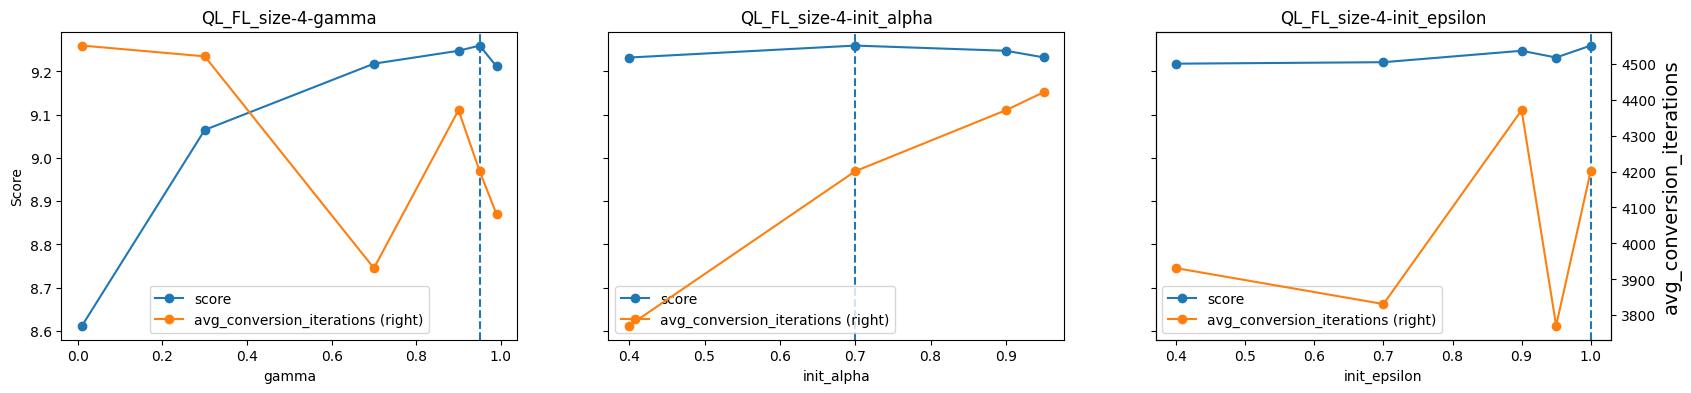

size  gamma  init_alpha  init_epsilon   steps    V_mean      time  \
103     8   0.99        0.95           0.7  63.055  4.420232  0.000224   

      score  avg_conversion_iterations  
103  7.5178                     4801.0

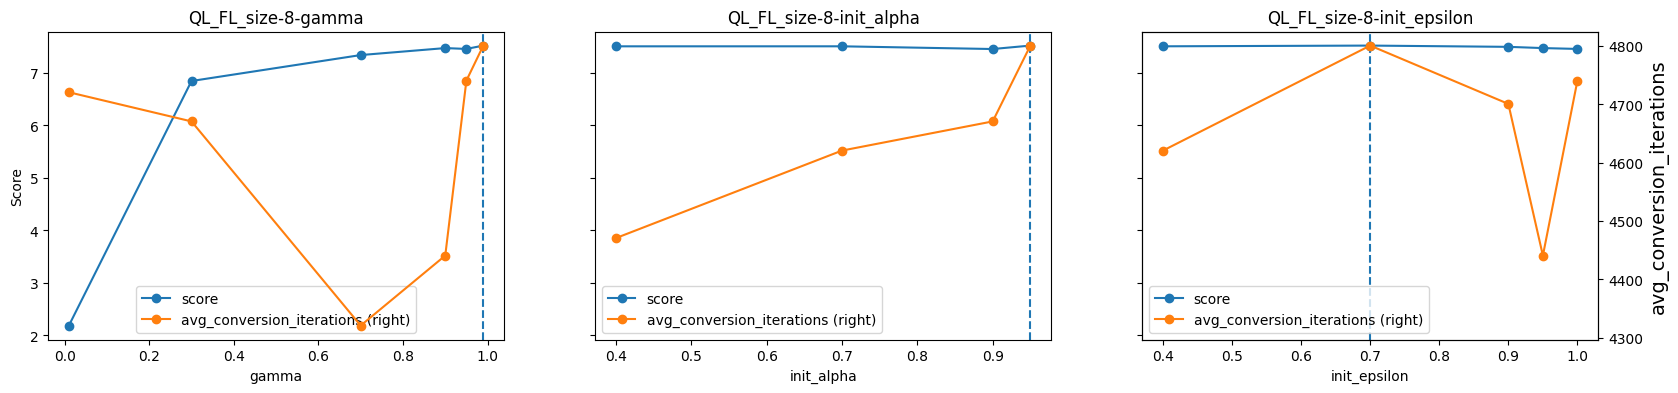

size  gamma  init_alpha  init_epsilon   steps    V_mean      time   score  \
89    12   0.95         0.9           0.4  140.86  0.091369  0.000511  3.5542   

    avg_conversion_iterations  
89                     4721.0

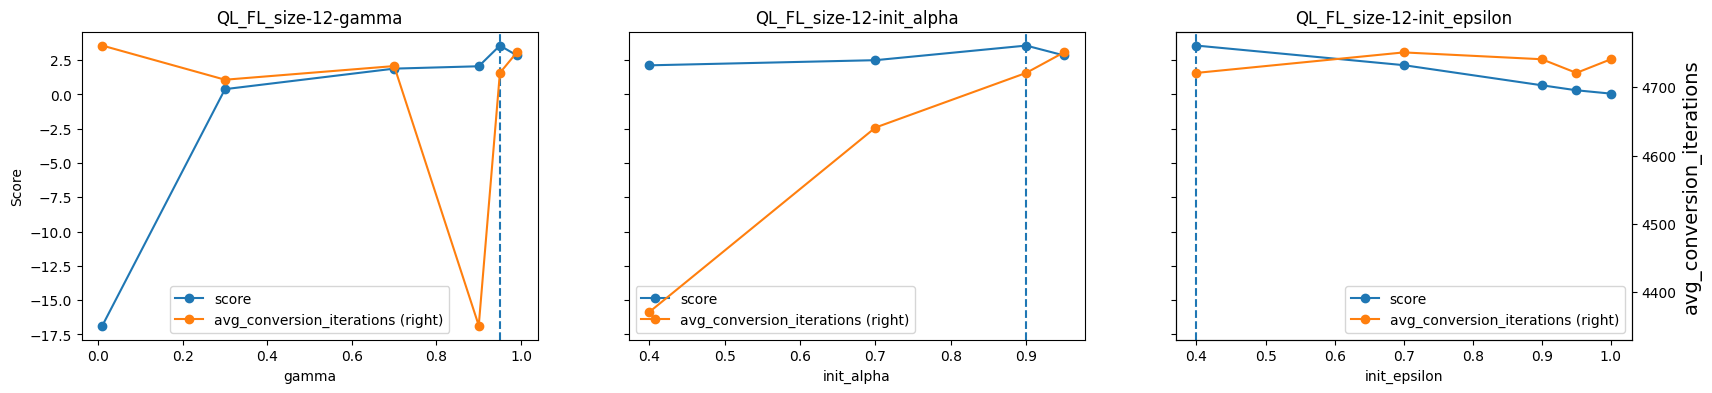

size  gamma  init_alpha  init_epsilon   steps    V_mean      time  \
64    16    0.9        0.95           0.4  428.97 -0.489022  0.001515   

      score  avg_conversion_iterations  
64 -13.1238                     4761.0

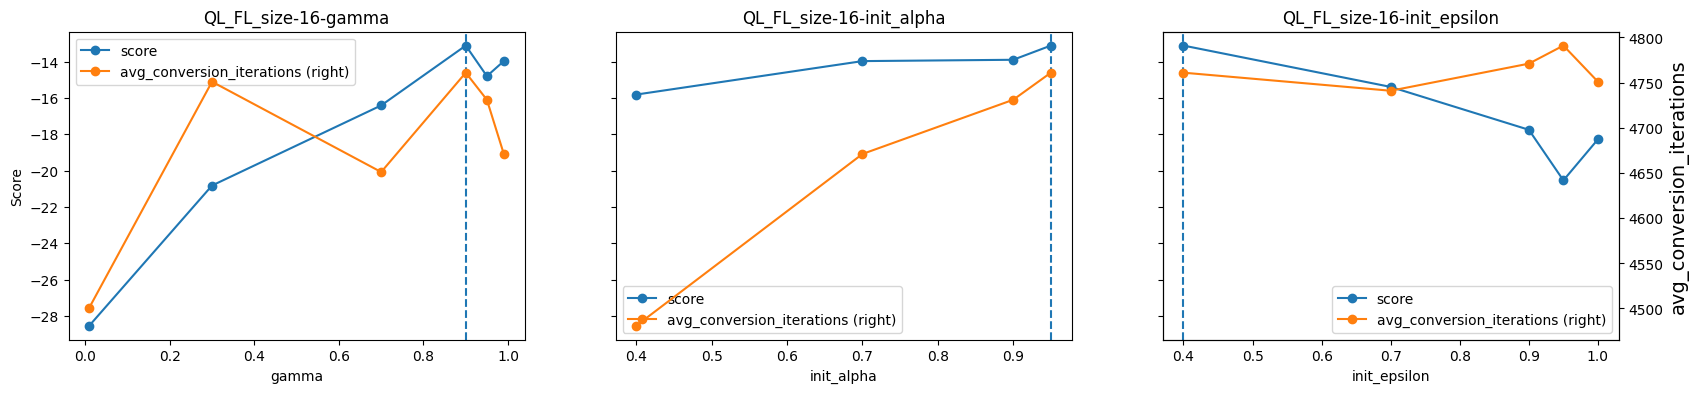

size  gamma  init_alpha  init_epsilon   steps    V_mean      time  \
89    20   0.95         0.9           0.4  486.57 -0.548411  0.001734   

      score  avg_conversion_iterations  
89 -24.7486                     4771.0

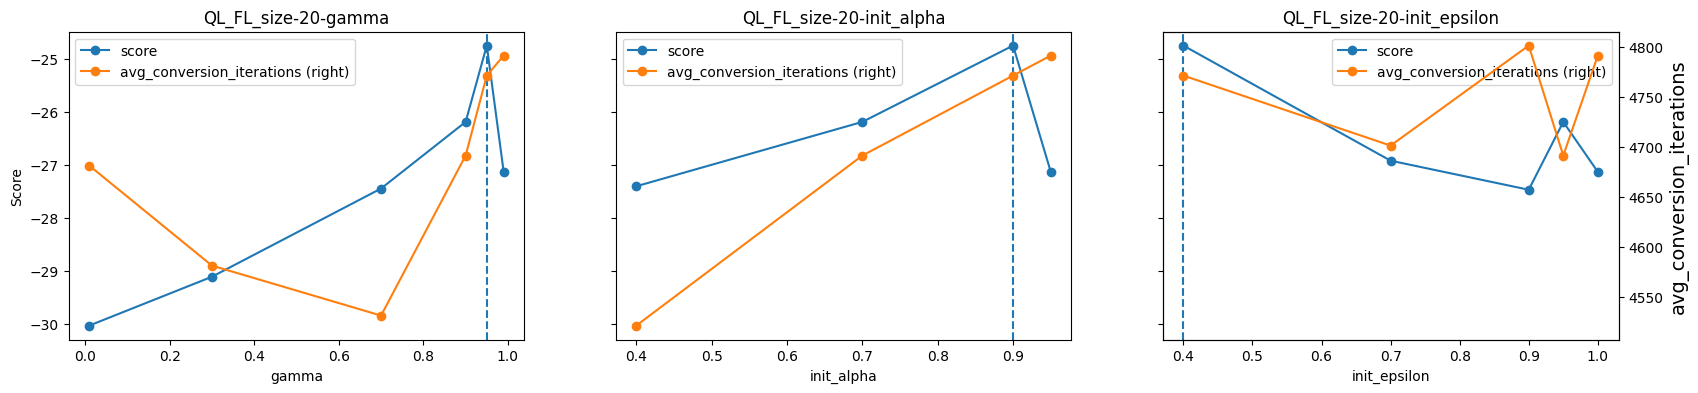

size  gamma  init_alpha  init_epsilon   steps    V_mean      time  \
116    24   0.99         0.4          0.95  227.62 -0.165471  0.000818   

       score  avg_conversion_iterations  
116 -24.0648                     4491.0

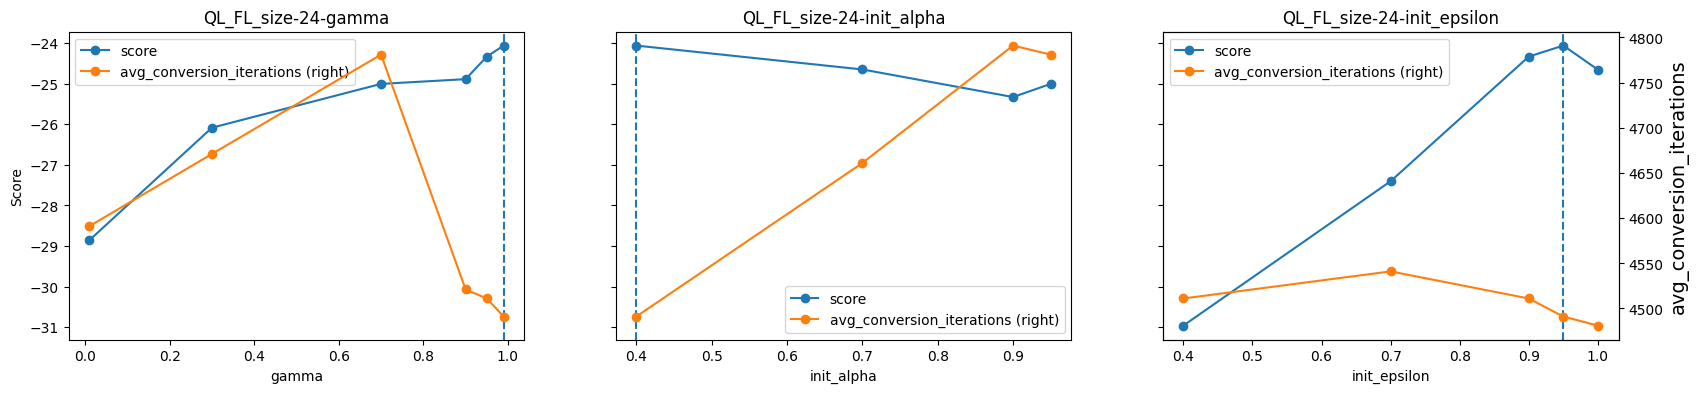

size  gamma  init_alpha  init_epsilon    steps    V_mean      time  \
100    32   0.99        0.95           1.0  241.385 -0.163083  0.000946   

       score  avg_conversion_iterations  
100 -24.6154                     4791.0

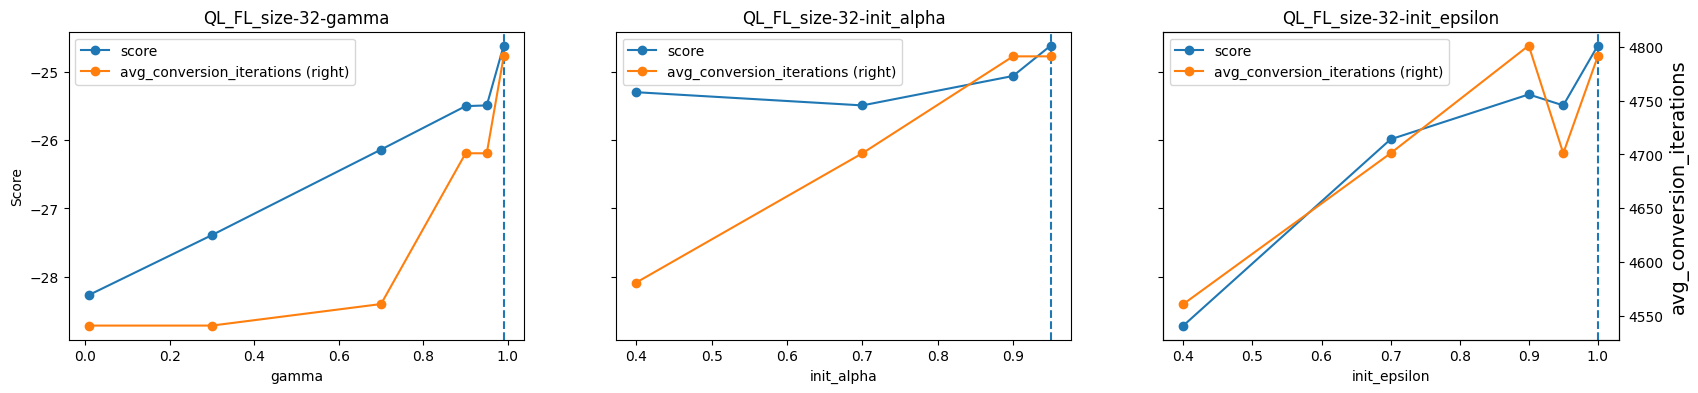

[None, None, None, None, None, None, None]

In [1787]:


grid = {

'gamma' : [0.01,0.3,0.7,0.9,0.95,0.99],#1],
'init_alpha' : [ 0.95,0.9,0.7,0.4 ],
'init_epsilon' : [ 1,0.95,0.9,0.7,0.4 ]
    
}

algo_iter =  'RL_iter'
algo = 'QL'
env_name = 'FL'
size_ = 4
score_ = 'steps'
steps_ = 'time'
time_ = 'score'

[


create_q_evaluation_charts(grid
                              
                              
                                    ,algo_iter = algo_iter
                           
                                    ,algo = algo
                           ,env_name = env_name
                           ,size_ = i
                           ,score_ = score_
                           ,steps_ = steps_
                           ,time_ = time_,
                           selected = 'score'
                           








                                  ) for i in  [4,8,12,16,20,24,32]] 

### Mountain car: Q learning for selected grid for all sizes | and all parameters for selected size 

size  gamma  init_alpha  init_epsilon   steps    V_mean      time   score  \
1     5    0.9        0.95           0.9  603.08 -5.485385  0.012104 -603.08   

   avg_conversion_iterations  
1                      561.0

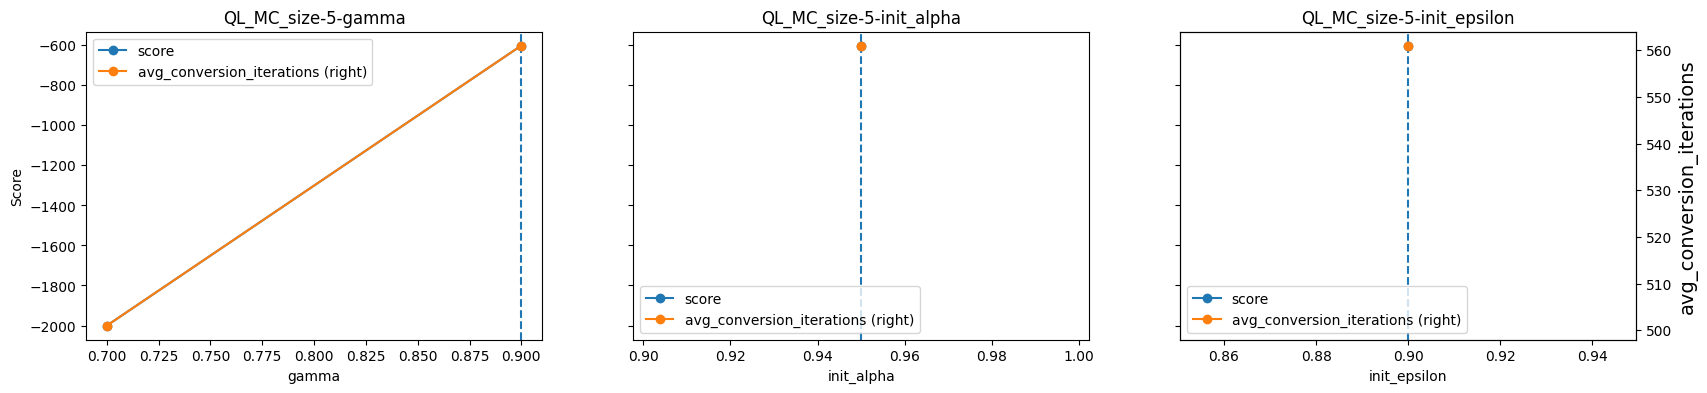

size  gamma  init_alpha  init_epsilon    steps   V_mean      time    score  \
1    10    0.9        0.95           0.9  1058.54 -5.81879  0.024744 -1058.54   

   avg_conversion_iterations  
1                      541.0

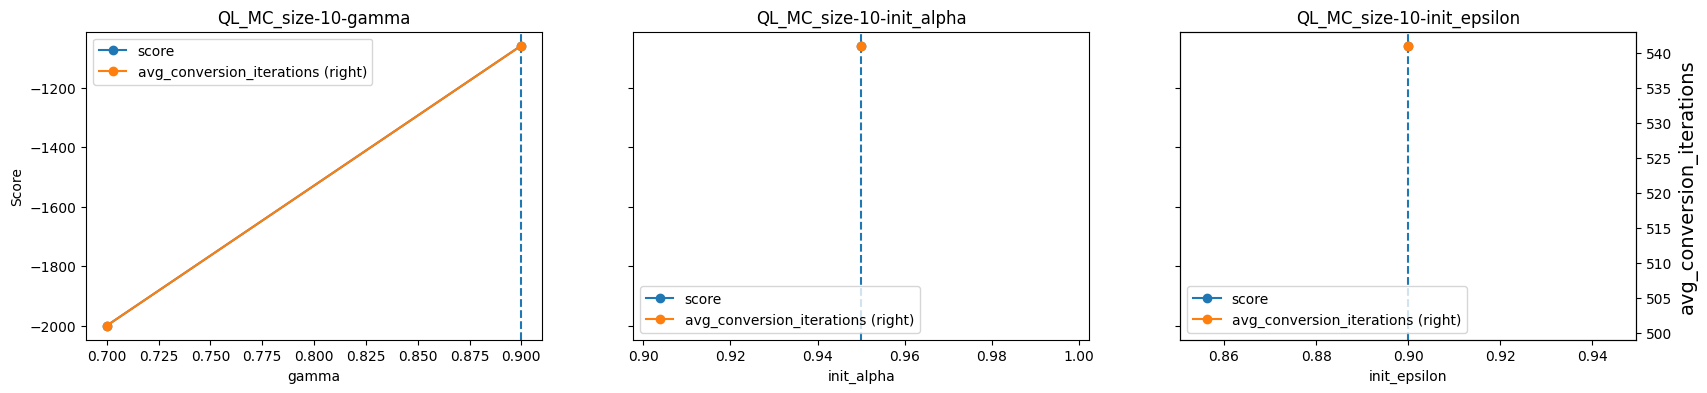

size  gamma  init_alpha  init_epsilon   steps    V_mean      time   score  \
1    15    0.9        0.95           0.9  171.66 -5.723058  0.004636 -171.66   

   avg_conversion_iterations  
1                      521.0

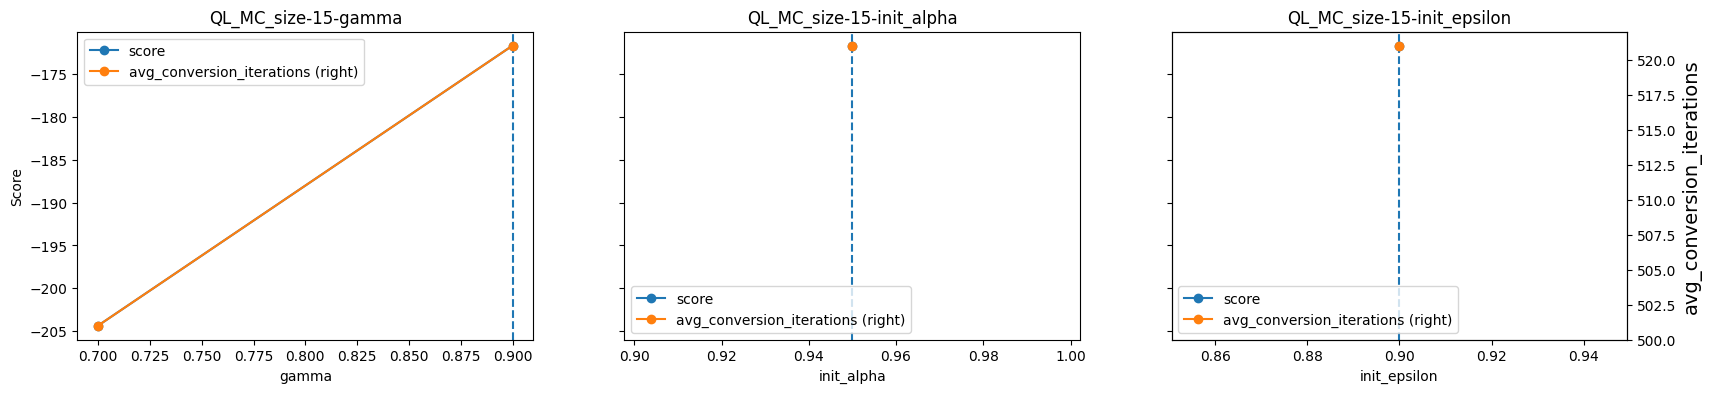

size  gamma  init_alpha  init_epsilon   steps    V_mean      time   score  \
0    20    0.7        0.95           0.9  145.52 -1.999937  0.004808 -145.52   

   avg_conversion_iterations  
0                      501.0

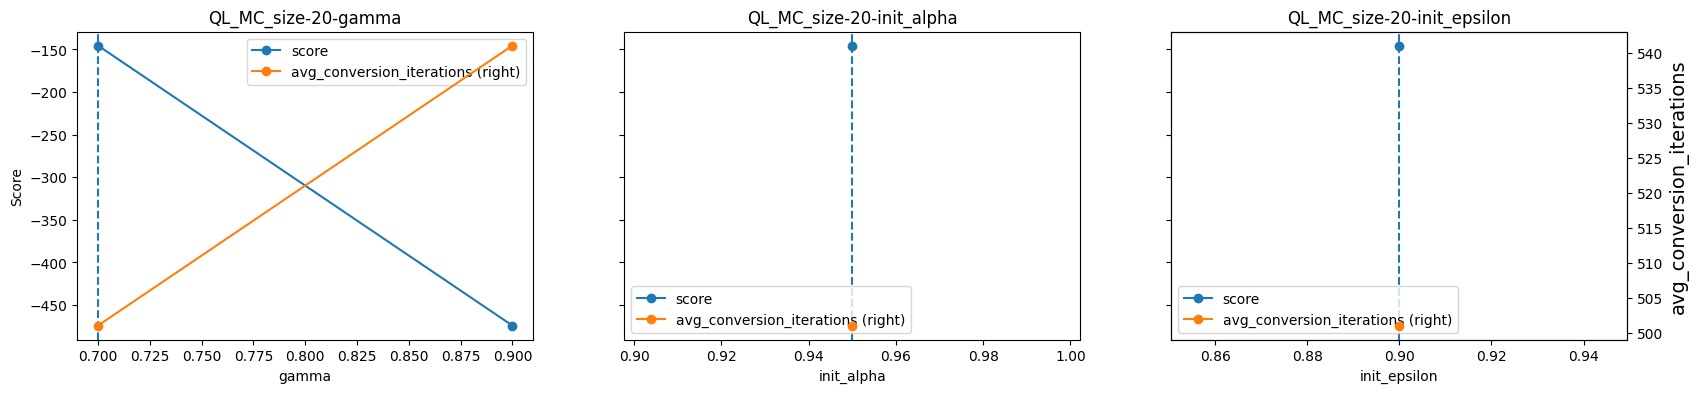

size  gamma  init_alpha  init_epsilon   steps    V_mean      time   score  \
0    25    0.7        0.95           0.9  135.26 -2.011208  0.005463 -135.26   

   avg_conversion_iterations  
0                      501.0

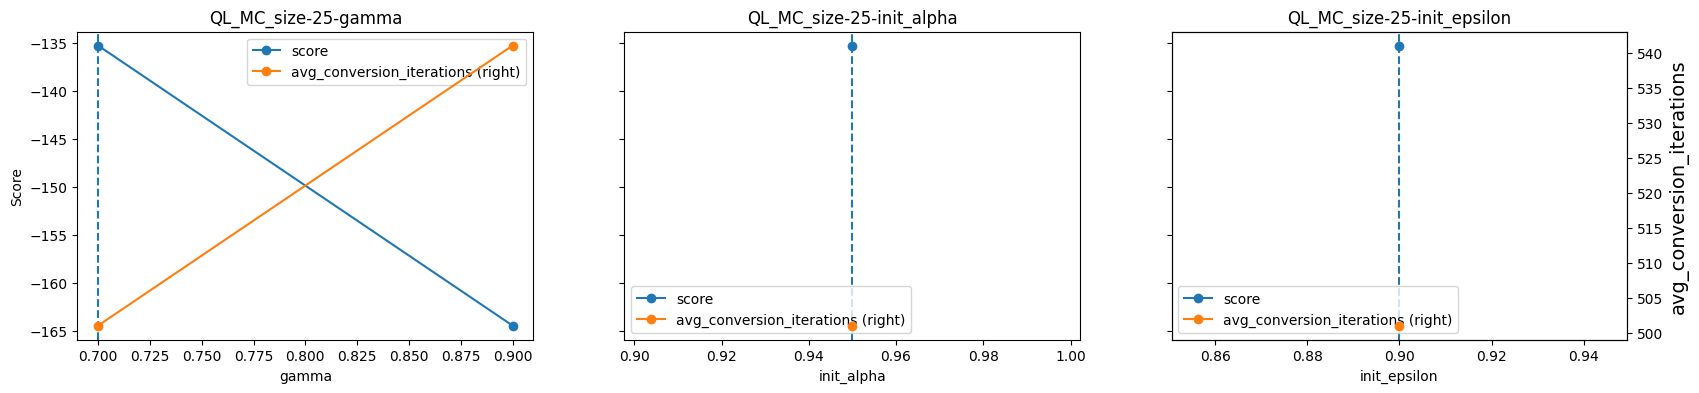

size  gamma  init_alpha  init_epsilon   steps    V_mean      time   score  \
1    30    0.9        0.95           0.9  158.08 -5.325615  0.007698 -158.08   

   avg_conversion_iterations  
1                      561.0

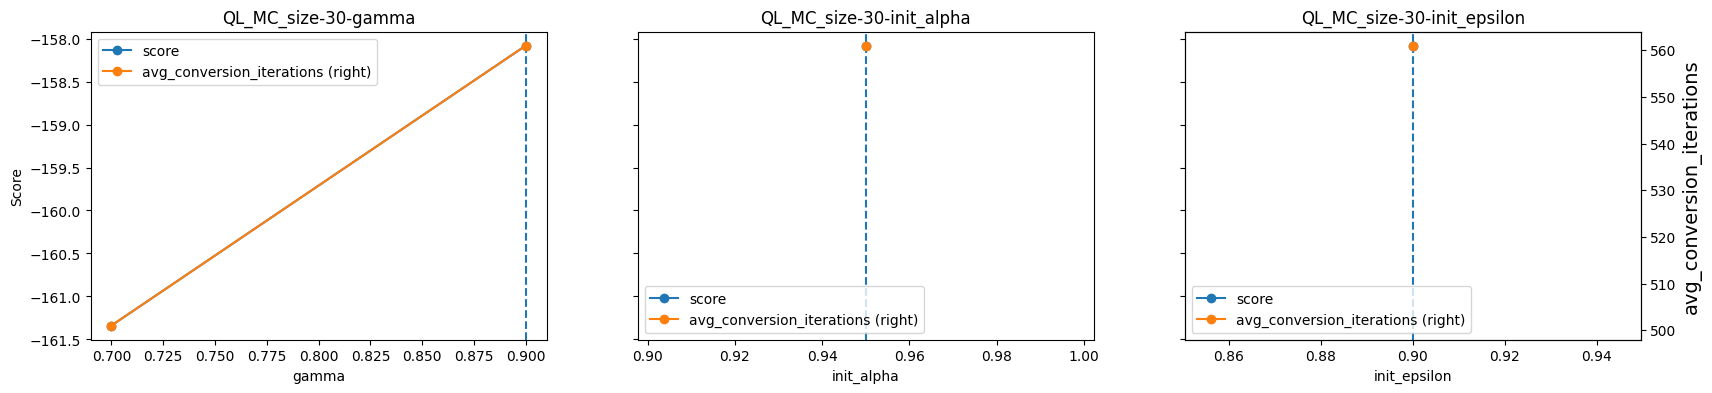

size  gamma  init_alpha  init_epsilon   steps    V_mean      time   score  \
42    25    0.7        0.95           0.9  135.26 -2.011208  0.005463 -135.26   

    avg_conversion_iterations  
42                      501.0

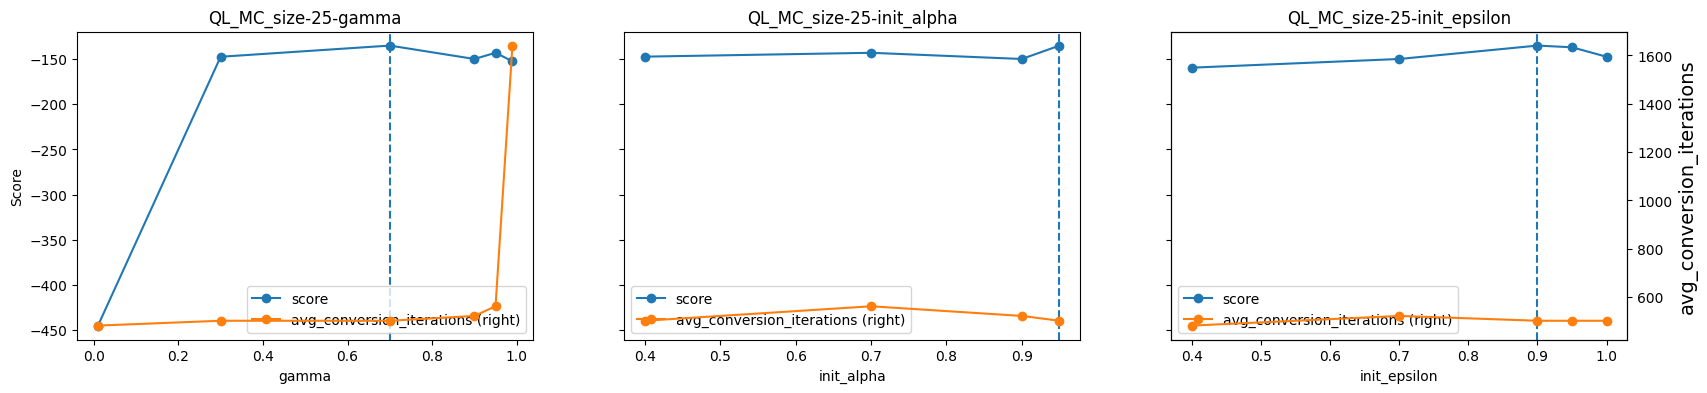

In [1788]:


sizes_rid = [5,10,15,20,25,30]

grid = {

'gamma' : [0.7,0.9],#[0.01,0.3,0.7,0.9,0.95,0.99,],#1],
'init_alpha' : [0.95],#[ 0.95,0.9,0.7,0.4 ],
'init_epsilon' : [0.9]#[ 1,0.95,0.9,0.7,0.4 ]
}


algo_iter =  'RL_iter'
algo = 'QL'
env_name = 'MC'
size_ = 5
score_ ='score' #'steps'
steps_ ='steps' #'time'
time_ = 'time'#score'

[


create_q_evaluation_charts(grid
                              
                              
                                    ,algo_iter = algo_iter
                           
                                    ,algo = algo
                           ,env_name = env_name
                           ,size_ = i
                           ,score_ = score_
                           ,steps_ = steps_
                           ,time_ = time_
                           
                            ,misc = '_all',selected = 'score'

                                  ) for i in  sizes_rid] 





## for selected size all params

create_q_evaluation_charts(grid = {

'gamma' : [0.01,0.3,0.7,0.9,0.95,0.99],#1],
'init_alpha' : [ 0.95,0.9,0.7,0.4 ],
'init_epsilon' : [ 1,0.95,0.9,0.7,0.4 ]
    
}
                              
                              
                                    ,algo_iter = algo_iter
                           
                                    ,algo = algo
                           ,env_name = env_name
                           ,size_ = 25
                           ,score_ = score_
                           ,steps_ = steps_
                           ,time_ = time_
                           
                            ,misc = '_25_only',selected = 'score'


                                  )

### Frozen lake : Policy iteration for all grid parameters | for all sizes

size  gamma         theta   steps      time    score  \
5     4   0.99  1.000000e-13  21.808  0.000082  9.12752   

   avg_conversion_iterations  
5                        5.5

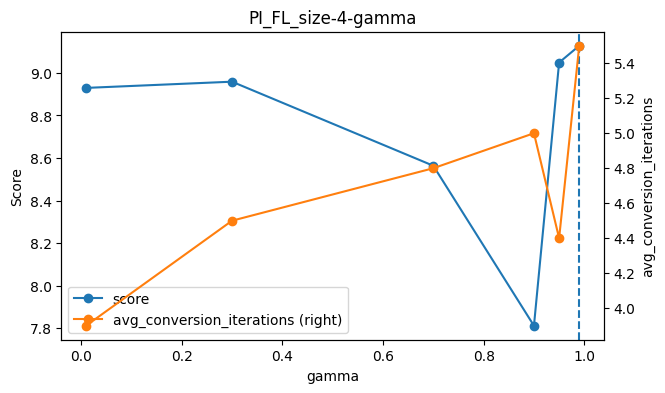

size  gamma         theta   steps      time    score  \
5     8   0.99  1.000000e-13  62.172  0.000223  7.55312   

   avg_conversion_iterations  
5                        7.5

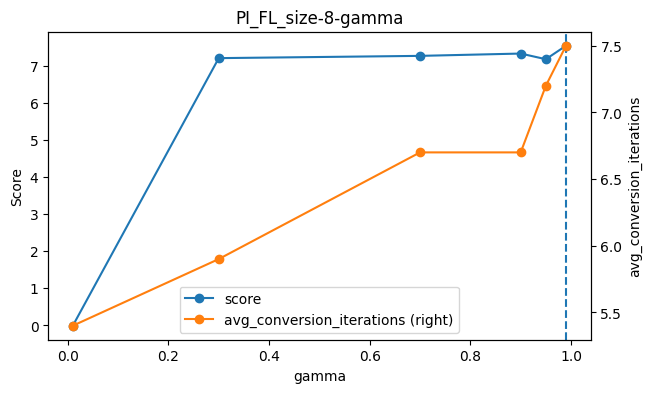

size  gamma         theta   steps     time   score  \
5    12   0.99  1.000000e-13  114.01  0.00043  4.3296   

   avg_conversion_iterations  
5                       11.1

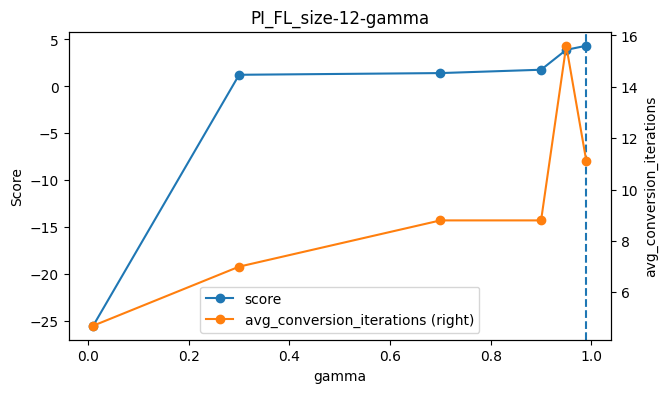

size  gamma         theta    steps      time   score  \
5    16   0.99  1.000000e-13  331.152  0.001167 -6.0408   

   avg_conversion_iterations  
5                       13.5

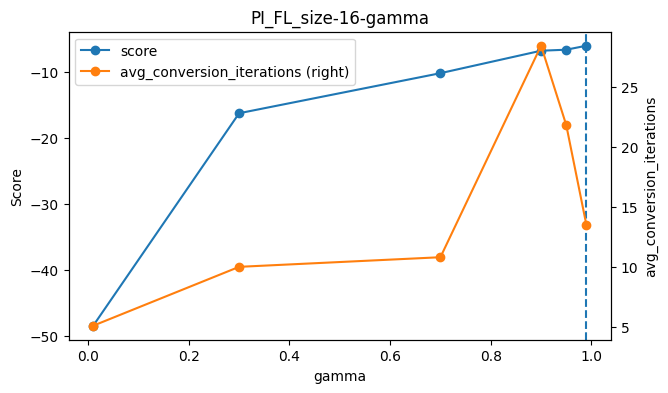

size  gamma         theta    steps      time    score  \
5    20   0.99  1.000000e-13  194.184  0.000684  0.92264   

   avg_conversion_iterations  
5                  50.900002

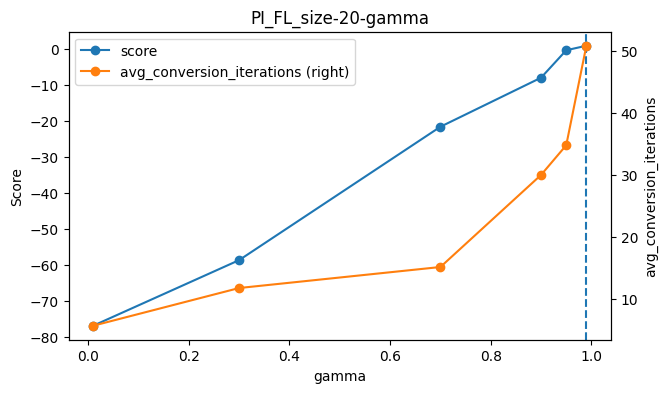

size  gamma         theta    steps     time    score  \
5    24   0.99  1.000000e-13  250.502  0.00089 -2.83008   

   avg_conversion_iterations  
5                  87.900002

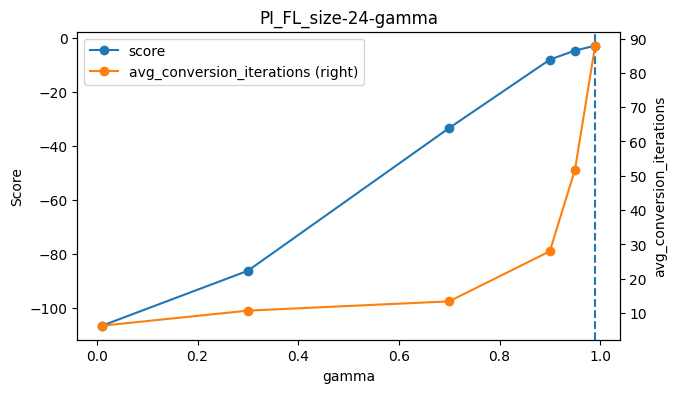

size  gamma         theta    steps      time    score  \
5    32   0.99  1.000000e-13  283.748  0.001006 -1.60992   

   avg_conversion_iterations  
5                  67.699997

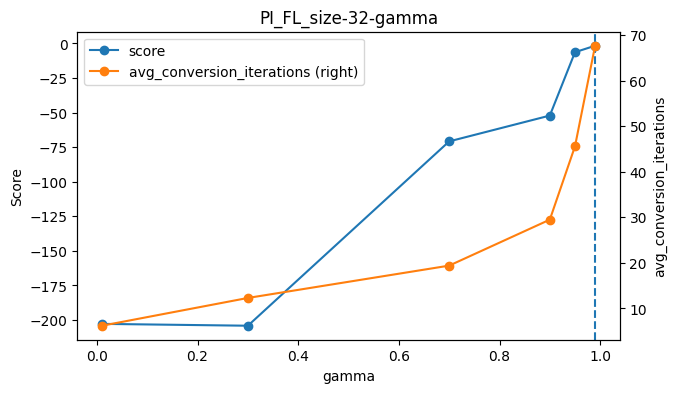

[None, None, None, None, None, None, None]

In [1789]:

grid = {

'gamma' : [0.01,0.3,0.7,0.9,0.95,0.99],#1],
    
}





algo_iter =  'polic_iter'
algo = 'PI'
env_name = 'FL'
size_ = 4
score_ = 'steps'
steps_ = 'time'
time_ = 'score'




[create_pivi_evaluation_charts(grid
                              
                              
                                    ,algo_iter = algo_iter
                           
                                    ,algo = algo
                           ,env_name = env_name
                           ,size_ = i
                           ,score_ = score_
                           ,steps_ = steps_
                           ,time_ = time_
                           








                                  ) for i in  [4,8,12,16,20,24,32]] 

### Frozen lake : Value iteration for all grid parameters | for all sizes

size  gamma         theta   steps      time    score  \
5     4   0.99  1.000000e-13  21.742  0.000084  9.13016   

   avg_conversion_iterations  
5                 302.600006

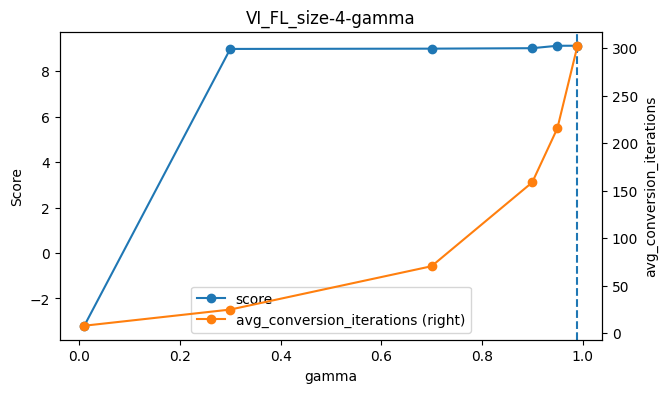

size  gamma         theta   steps      time    score  \
5     8   0.99  1.000000e-13  61.448  0.000215  7.58208   

   avg_conversion_iterations  
5                 690.099976

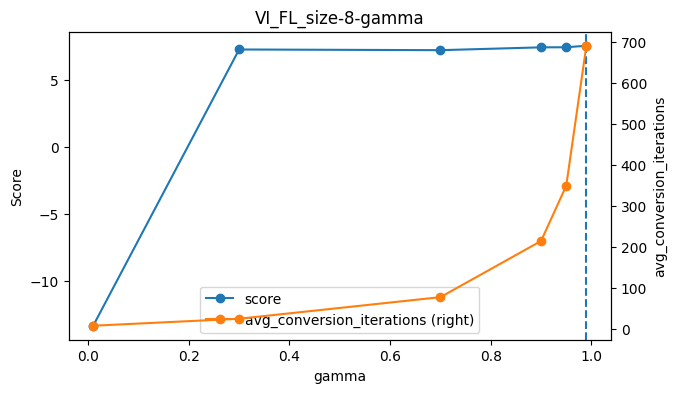

size  gamma         theta   steps      time   score  \
5    12   0.99  1.000000e-13  113.97  0.000409  4.3312   

   avg_conversion_iterations  
5                      947.5

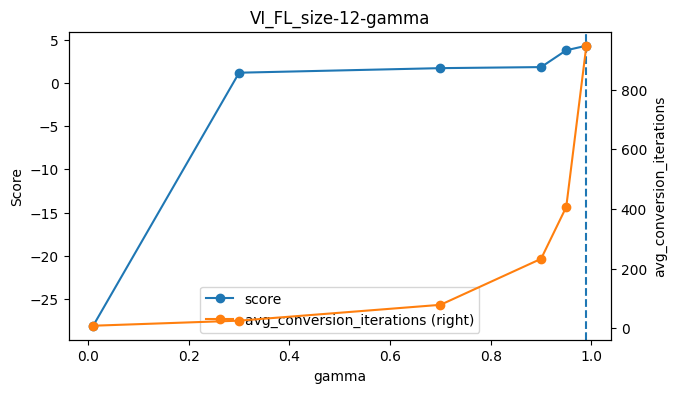

size  gamma         theta   steps      time    score  \
5    16   0.99  1.000000e-13  331.99  0.001257 -6.12432   

   avg_conversion_iterations  
5                1427.900024

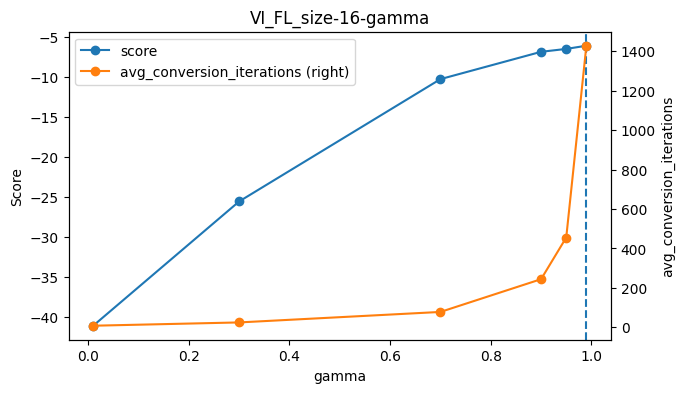

size  gamma         theta    steps      time    score  \
5    20   0.99  1.000000e-13  194.184  0.000683  0.97264   

   avg_conversion_iterations  
5                1197.900024

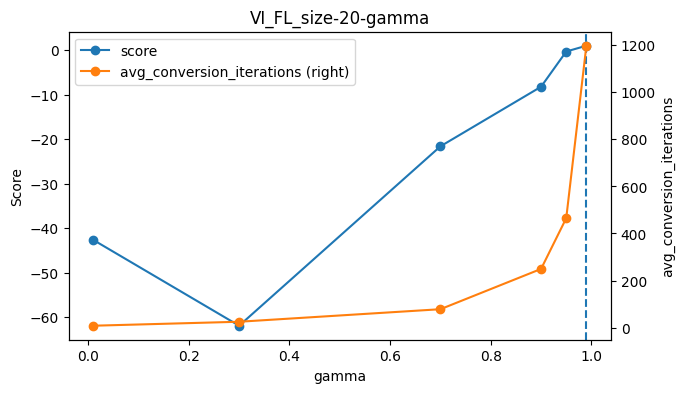

size  gamma         theta    steps      time    score  \
5    24   0.99  1.000000e-13  251.284  0.000887 -2.71136   

   avg_conversion_iterations  
5                1316.400024

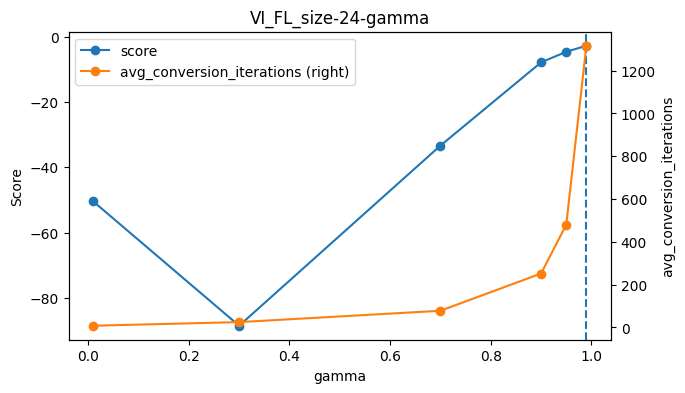

size  gamma         theta    steps      time    score  \
5    32   0.99  1.000000e-13  283.478  0.001001 -1.54912   

   avg_conversion_iterations  
5                     1218.0

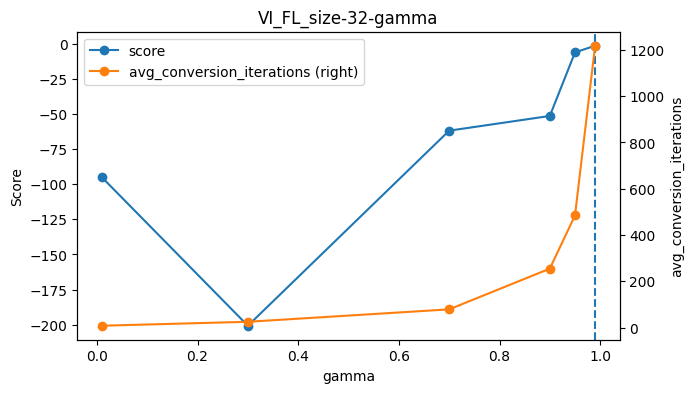

[None, None, None, None, None, None, None]

In [1790]:

grid = {

'gamma' : [0.01,0.3,0.7,0.9,0.95,0.99],#1],
    
}

algo_iter =  'Valu_iter'
algo = 'VI'
env_name = 'FL'
size_ = 4
score_ = 'steps'
steps_ = 'time'
time_ = 'score'




[create_pivi_evaluation_charts(grid
                              
                              
                                    ,algo_iter = algo_iter
                           
                                    ,algo = algo
                           ,env_name = env_name
                           ,size_ = i
                           ,score_ = score_
                           ,steps_ = steps_
                           ,time_ = time_
                           








                                  ) for i in  [4,8,12,16,20,24,32]] 

### Mountain car : Policy iteration for all grid parameters | for all sizes

size  gamma         theta    steps     time    score  \
5     5   0.99  1.000000e-13  197.194  0.00405 -197.194   

   avg_conversion_iterations  
5                        2.9

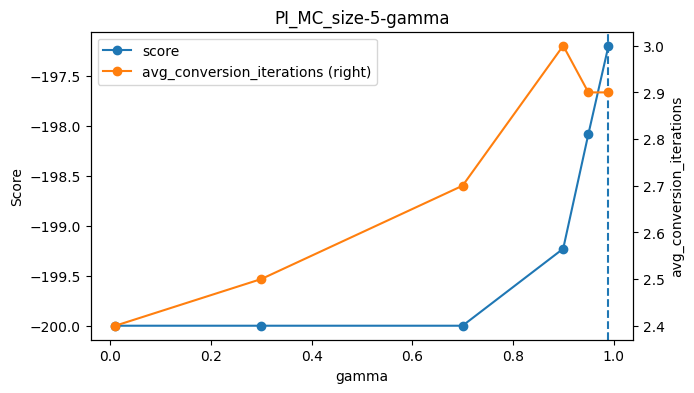

size  gamma         theta    steps      time    score  \
5    10   0.99  1.000000e-13  154.204  0.003758 -154.204   

   avg_conversion_iterations  
5                        4.1

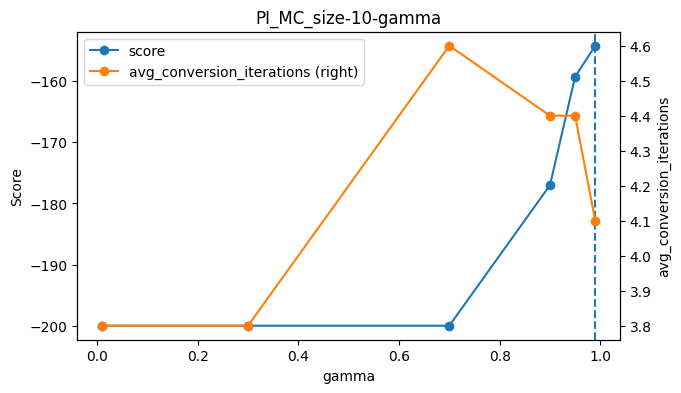

size  gamma         theta    steps      time    score  \
5    15   0.99  1.000000e-13  136.508  0.003765 -136.508   

   avg_conversion_iterations  
5                        4.2

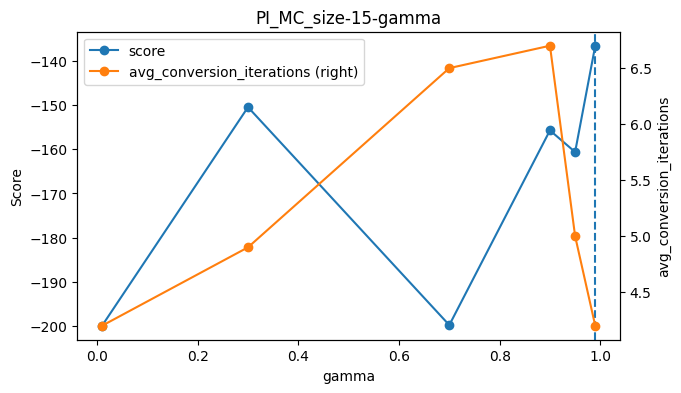

size  gamma         theta  steps      time  score  \
1    20    0.3  1.000000e-13  130.6  0.007713 -130.6   

   avg_conversion_iterations  
1                        6.0

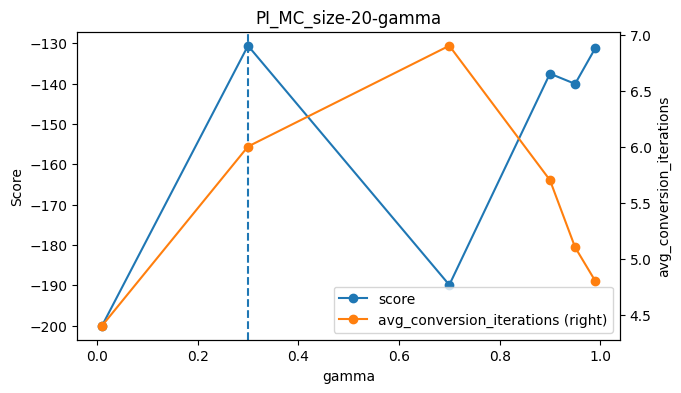

size  gamma         theta    steps      time    score  \
5    25   0.99  1.000000e-13  115.102  0.004624 -115.102   

   avg_conversion_iterations  
5                        4.9

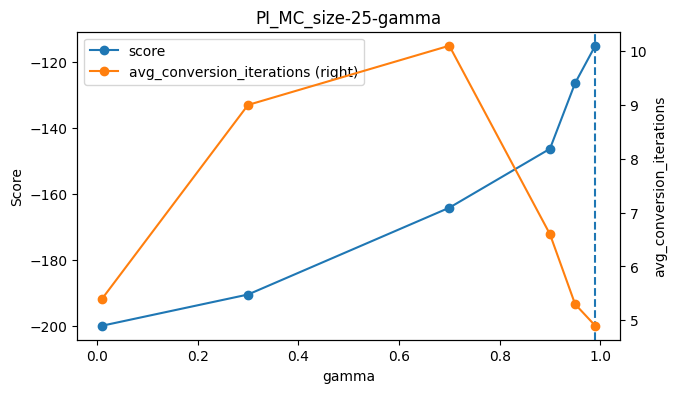

size  gamma         theta    steps      time    score  \
5    30   0.99  1.000000e-13  117.016  0.006143 -117.016   

   avg_conversion_iterations  
5                        5.6

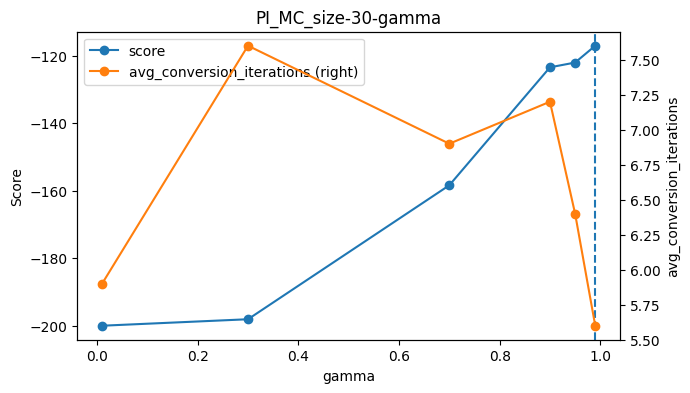

[None, None, None, None, None, None]

In [1791]:

grid = {

'gamma' : [0.01,0.3,0.7,0.9,0.95,0.99],#1],
    
}

algo_iter =  'polic_iter'
algo = 'PI'
env_name = 'MC'
size_ = 4

score_ = 'score'
steps_ = 'steps'
time_ = 'time'



[create_pivi_evaluation_charts(grid
                              
                              
                                    ,algo_iter = algo_iter
                           
                                    ,algo = algo
                           ,env_name = env_name
                           ,size_ = i
                           ,score_ = score_
                           ,steps_ = steps_
                           ,time_ = time_
                           








                                  ) for i in  [5,10,15,20,25,30]#[4,8,12,16,20,24,32]
] 

### Mountain Car: Value iteration for all grid parameters | for all sizes

size  gamma         theta   steps      time   score  \
4     5   0.95  1.000000e-13  199.14  0.004028 -199.14   

   avg_conversion_iterations  
4                      508.0

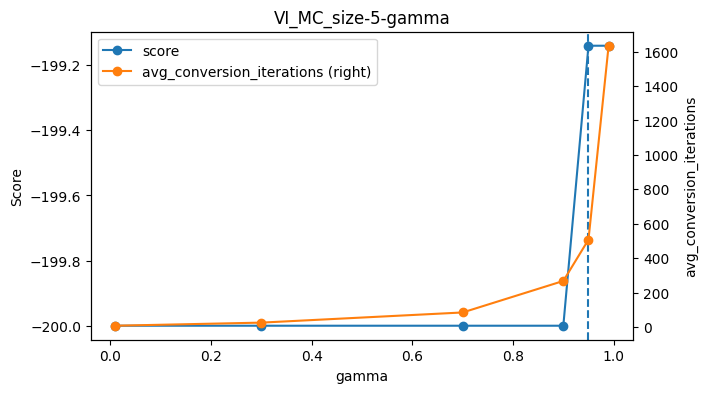

size  gamma         theta  steps      time  score  \
5    10   0.99  1.000000e-13  157.7  0.003644 -157.7   

   avg_conversion_iterations  
5                     2179.0

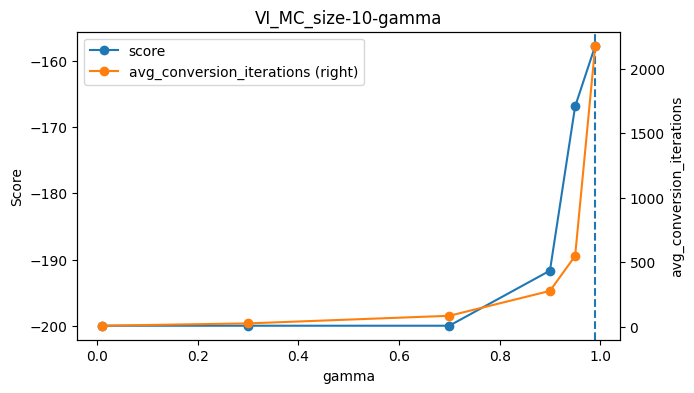

size  gamma         theta   steps     time   score  \
5    15   0.99  1.000000e-13  136.58  0.00371 -136.58   

   avg_conversion_iterations  
5                     1793.0

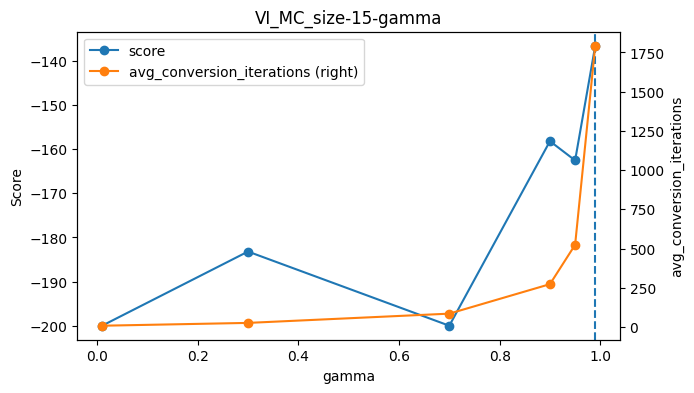

size  gamma         theta   steps      time   score  \
5    20   0.99  1.000000e-13  131.24  0.004295 -131.24   

   avg_conversion_iterations  
5                     1716.0

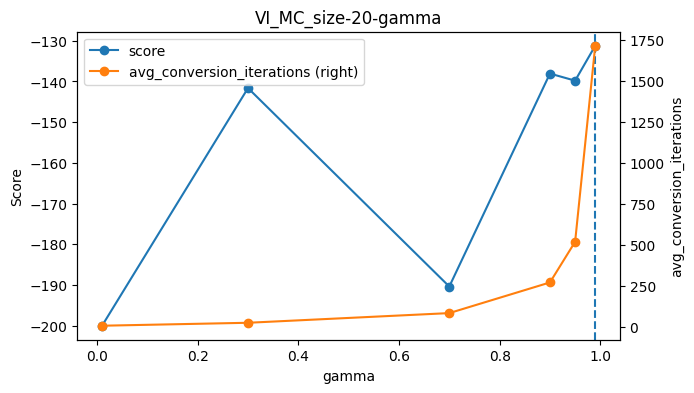

size  gamma         theta  steps      time  score  \
5    25   0.99  1.000000e-13  111.2  0.004435 -111.2   

   avg_conversion_iterations  
5                     1431.0

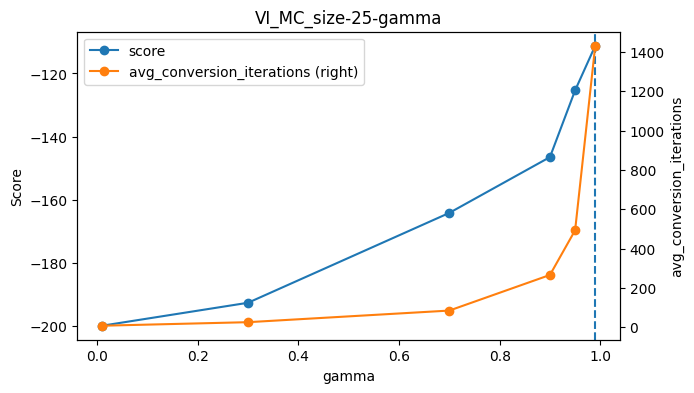

size  gamma         theta   steps      time   score  \
5    30   0.99  1.000000e-13  116.98  0.006117 -116.98   

   avg_conversion_iterations  
5                     1254.0

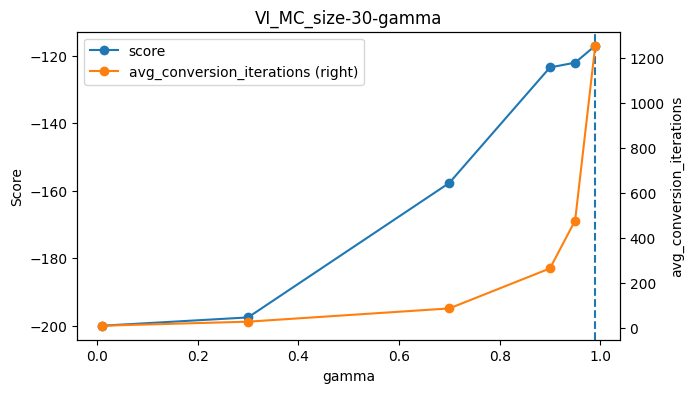

[None, None, None, None, None, None]

In [1792]:

grid = {

'gamma' : [0.01,0.3,0.7,0.9,0.95,0.99],#1],
    
}


algo_iter =  'Valu_iter'
algo = 'VI'


env_name = 'MC'

size_ = 4
score_ = 'score'
steps_ = 'steps'
time_ = 'time'




[create_pivi_evaluation_charts(grid
                              
                              
                                    ,algo_iter = algo_iter
                           
                                    ,algo = algo
                           ,env_name = env_name
                           ,size_ = i
                           ,score_ = score_
                           ,steps_ = steps_
                           ,time_ = time_


                                  ) for i in  [5,10,15,20,25,30]#[4,8,12,16,20,24,32]
] 

# Size perfomance compare Charts | best models

## mountain car | Q learning| across size comparison of best models | al features

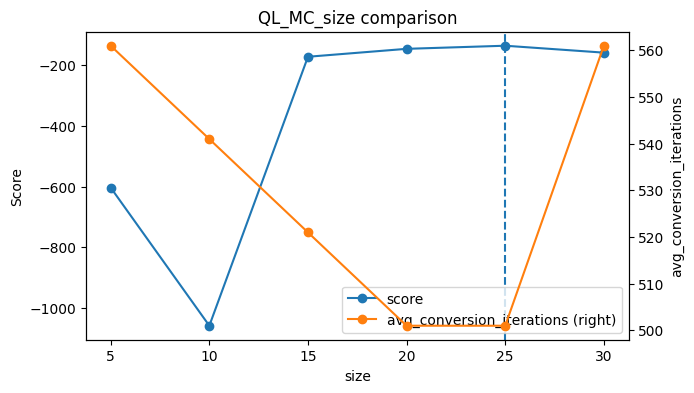

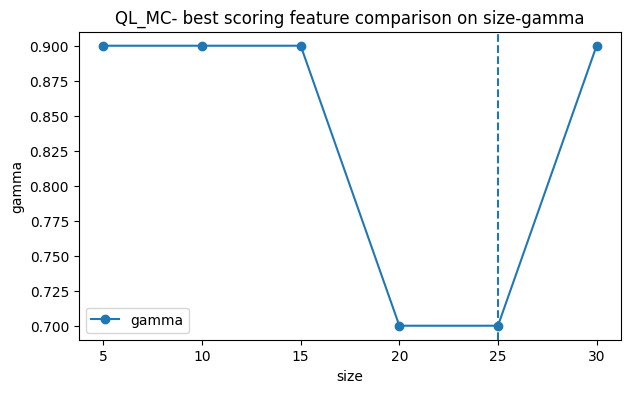

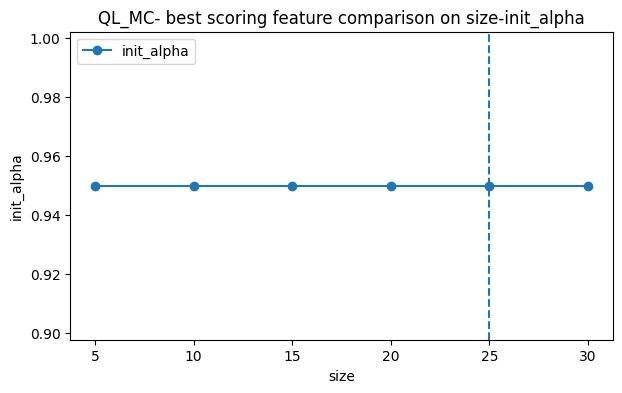

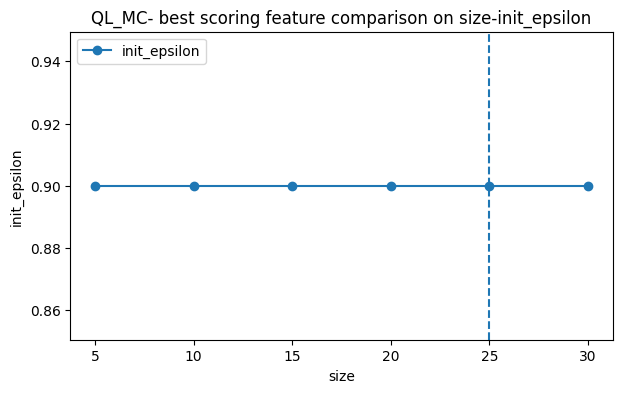

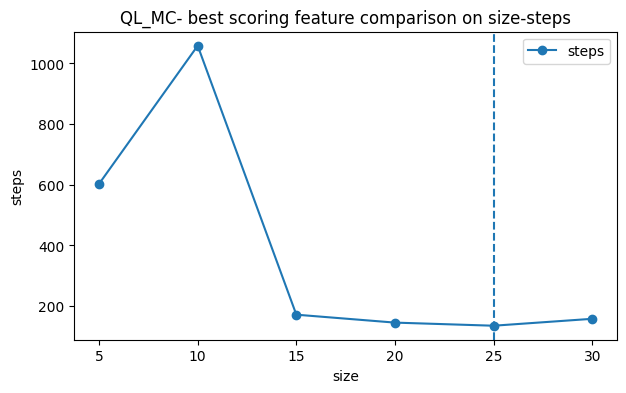

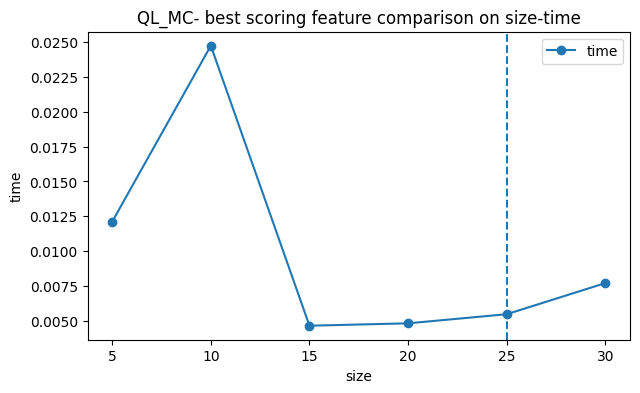

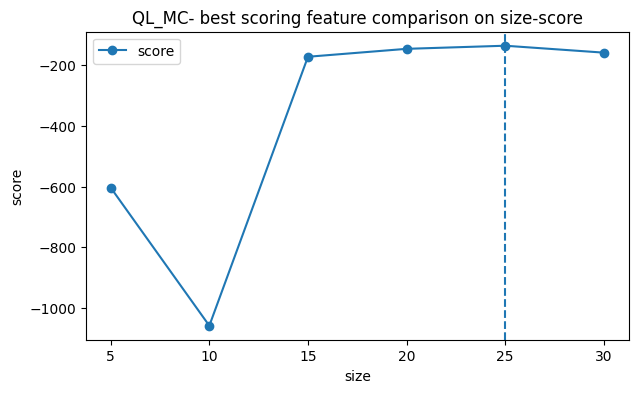

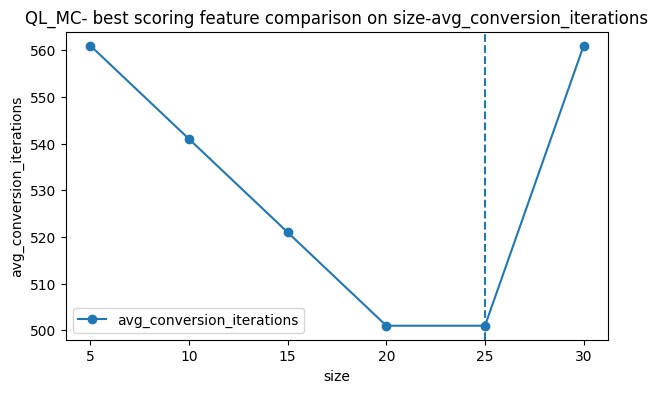

In [1780]:
create_size_comparison_charts(


save_folder = 'model_bests_'

,algo_iter =  'RL_iter'
,algo = 'QL'


,env_name = 'MC'

,misc = '_all'



,size_ = 25
,size = str(size_)

,sizes_dir = [5,10,15,20,25,30]





,feature_comparisons = [
'gamma'
,'init_alpha'
,'init_epsilon'
,'steps'
,'time'
,'score'
,'avg_conversion_iterations']



)






## mountain car | Policy Iteratoon  | across size comparison of best models | al features

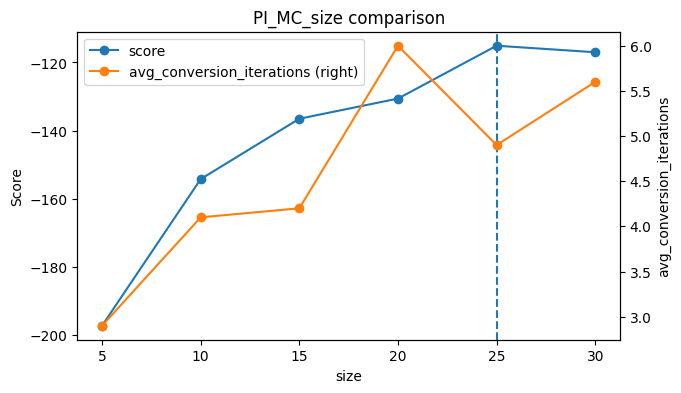

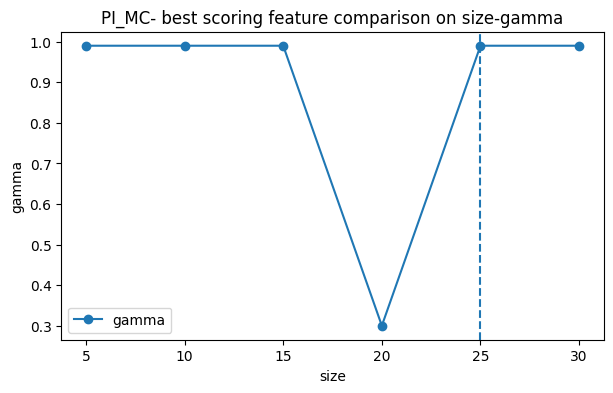

In [1781]:
create_size_comparison_charts(


save_folder = 'model_bests_'

,algo_iter =  'polic_iter'
,algo = 'PI'


,env_name = 'MC'

,misc = ''



,size_ = 25
,size = str(size_)

,sizes_dir = [5,10,15,20,25,30]





,feature_comparisons = ['gamma']



)

## mountain car| Value iteration | across size comparison of best models | al features

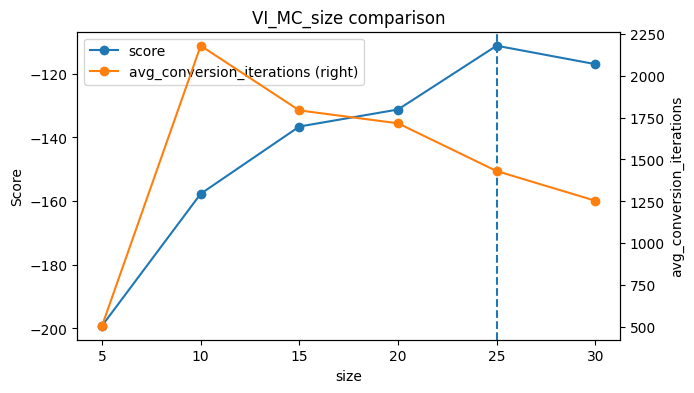

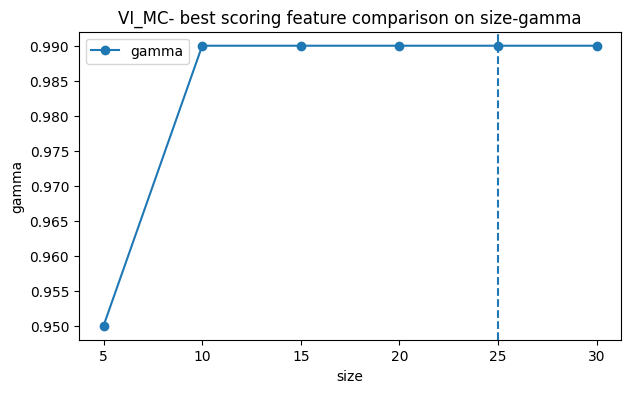

In [1782]:
create_size_comparison_charts(


save_folder = 'model_bests_'

,algo_iter =  'Valu_iter'
,algo = 'VI'


,env_name = 'MC'

,misc = ''



,size_ = 25
,size = str(size_)

,sizes_dir = [5,10,15,20,25,30]





,feature_comparisons = ['gamma']



)

## Frozen Lake |  Policy iteration | across size comparison of best models | al features

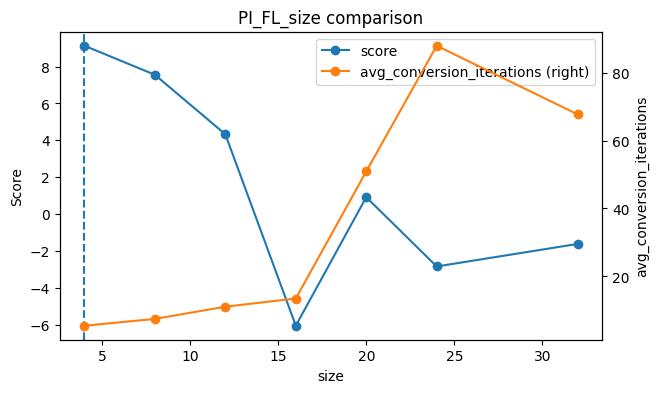

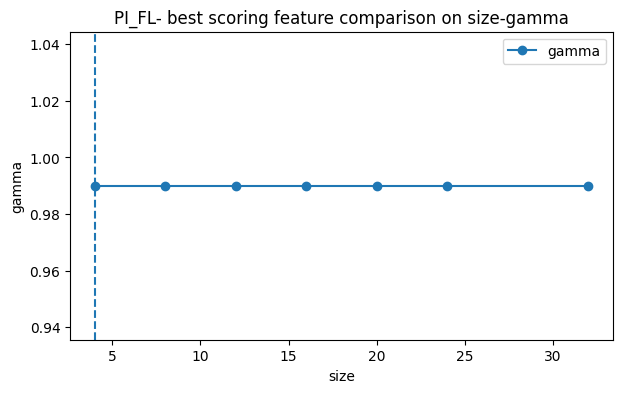

In [1783]:
create_size_comparison_charts(


save_folder = 'model_bests_'

,algo_iter =  'polic_iter'
,algo = 'PI'


,env_name = 'FL'

,misc = ''



,size_ = 4
,size = str(size_)

,sizes_dir = [4,8,12,16,20,24,32]





,feature_comparisons = ['gamma']



)

## Frozen Lake |  Value iteration | across size comparison of best models | al features

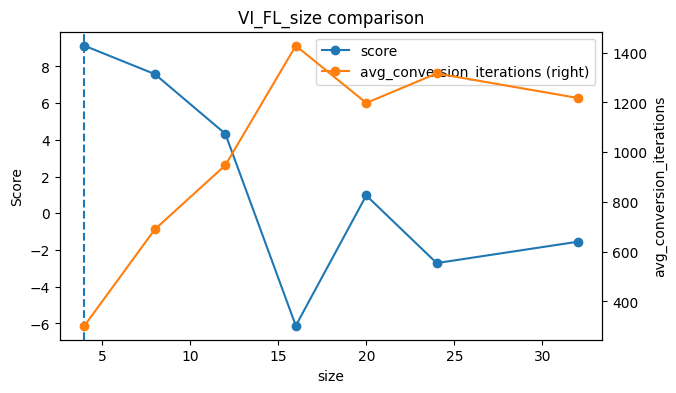

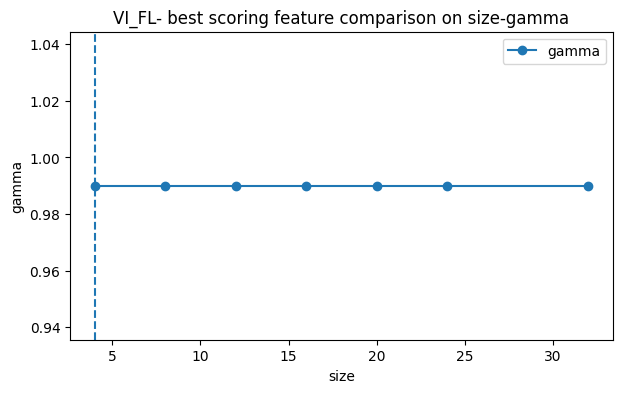

In [1784]:
create_size_comparison_charts(


save_folder = 'model_bests_'

,algo_iter =  'Valu_iter'
,algo = 'VI'


,env_name = 'FL'

,misc = ''



,size_ = 4
,size = str(size_)

,sizes_dir = [4,8,12,16,20,24,32]





,feature_comparisons = ['gamma']



)

## Frozen Lake |  Q learning| across size comparison of best models | al features

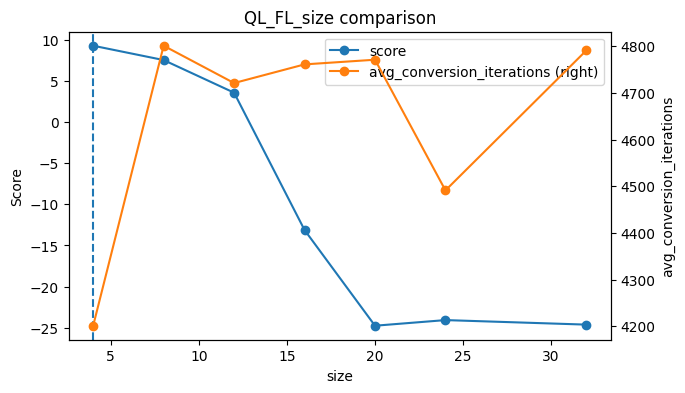

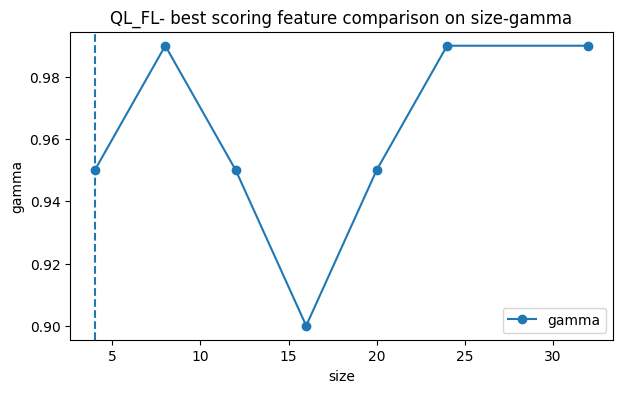

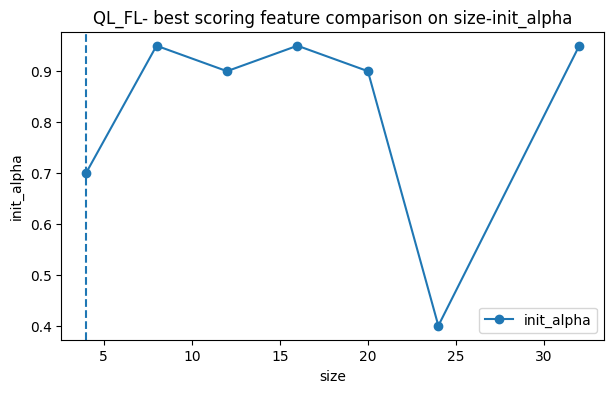

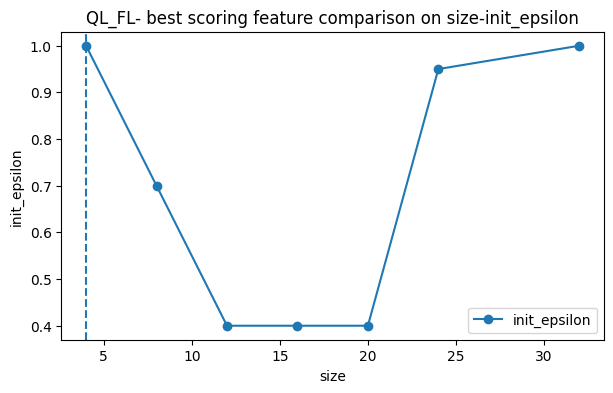

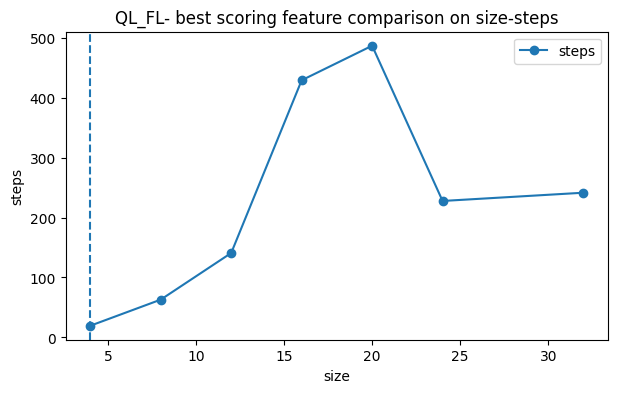

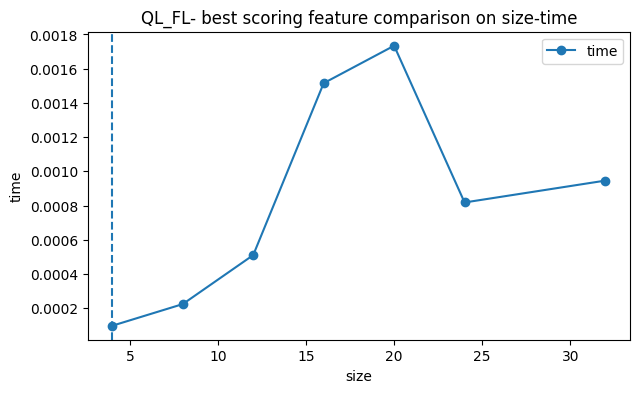

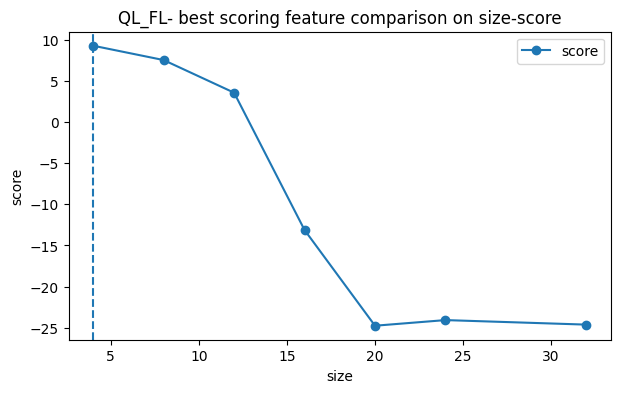

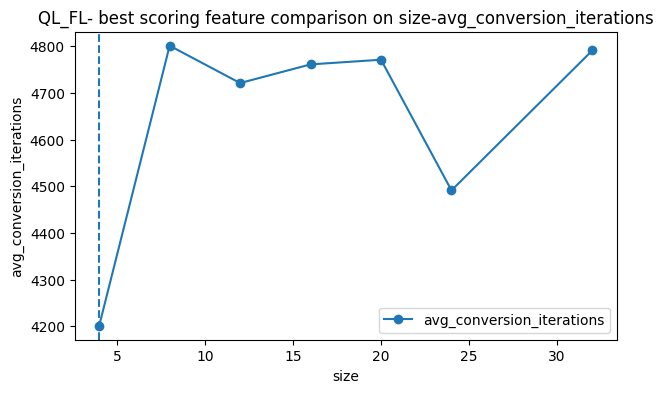

In [1786]:
create_size_comparison_charts(


save_folder = 'model_bests_'

,algo_iter =  'RL_iter'
,algo = 'QL'


,env_name = 'FL'

,misc = ''



,size_ = 4
,size = str(size_)

,sizes_dir = [4,8,12,16,20,24,32]





,feature_comparisons = [
'gamma'
,'init_alpha'
,'init_epsilon'
,'steps'
,'time'
,'score'
,'avg_conversion_iterations']



)






# Best model Convergence and exploration analysis charts

## Mountain car : Policy iterattion best model : size 25, gamma 0.99

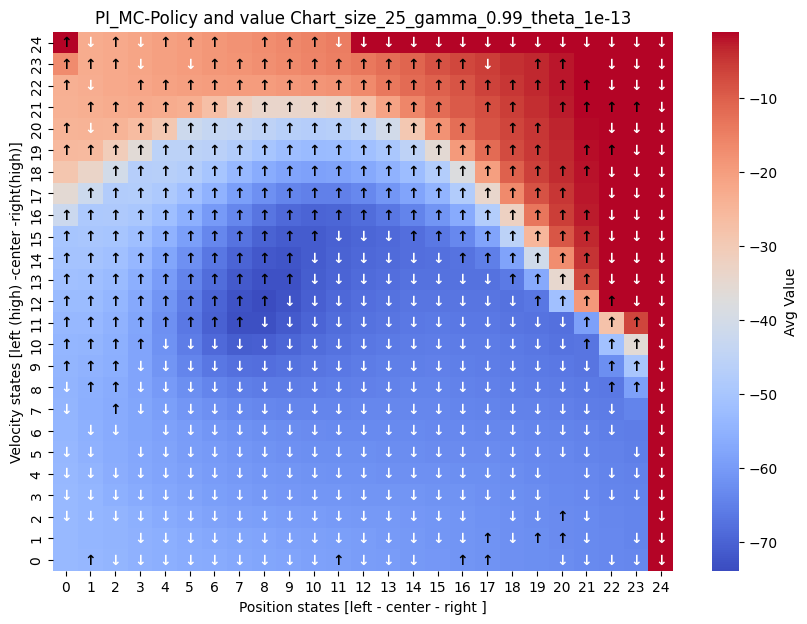

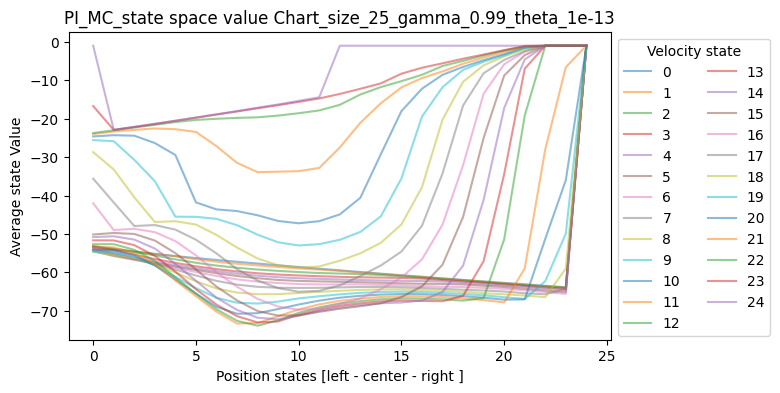

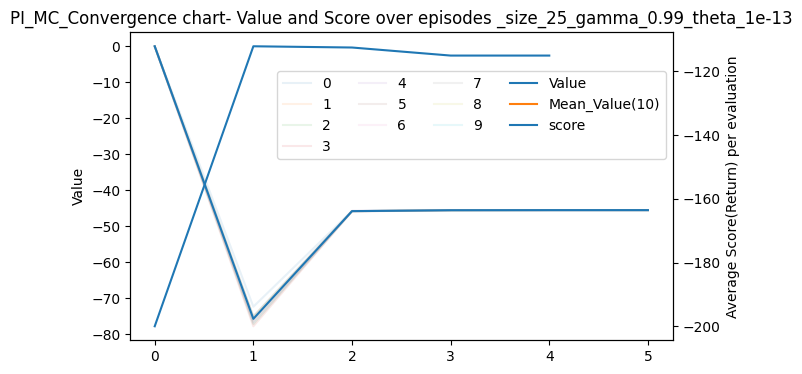

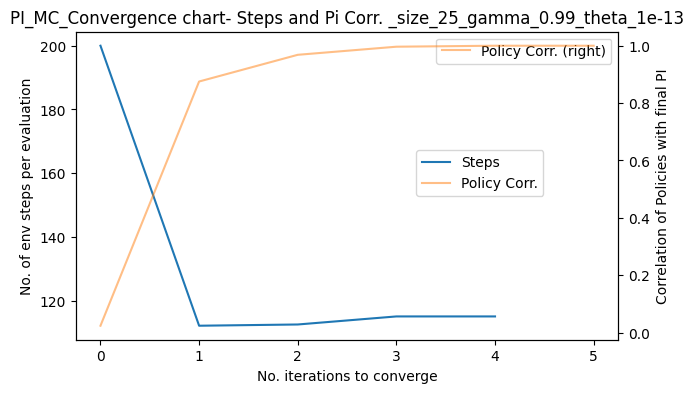

In [1765]:
get_convergence_analysis_on_particular_model_MC(
                              
                              
                                    algo_iter =  'polic_iter'
                                    ,algo = 'PI'
                                    ,env_name = 'MC'
                                    ,size_ = 25
                                    ,score_ =  'score'#     'steps'
                                    ,steps_ =  'steps'#     'time'
                                    ,time_ =  'time'#     ' score'
                                    ,misc=''

                                    ,save_folder='model_bests_'
                                   ,    selected = 'score' #score
                                     ,range_ =10#10
                                     ,gamma ="0.99",alpha = "0.95", eps = "0.9",
                                     interval = 1,bbox_to_anchor=(0.9, 0.8)


                                  )

## Mountain car : Value iterattion best model : size 25, gamma 0.99

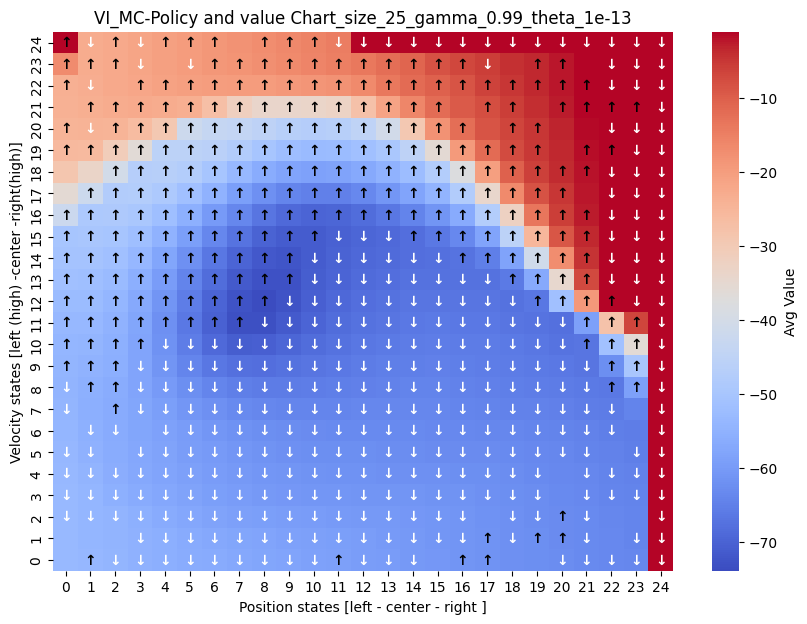

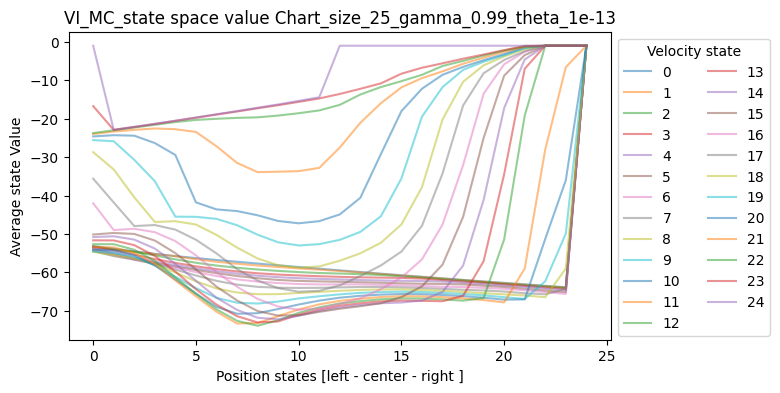

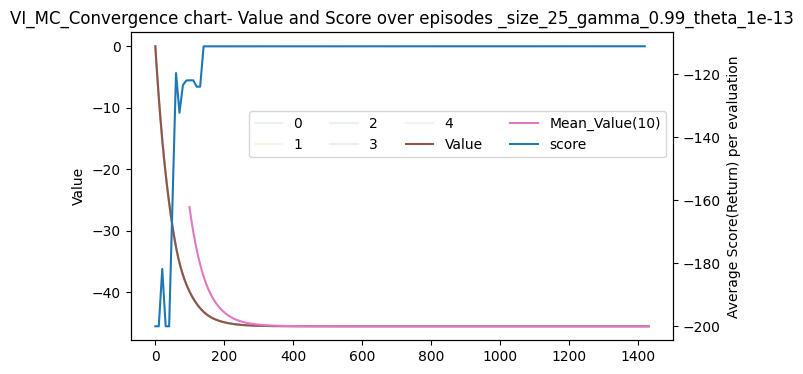

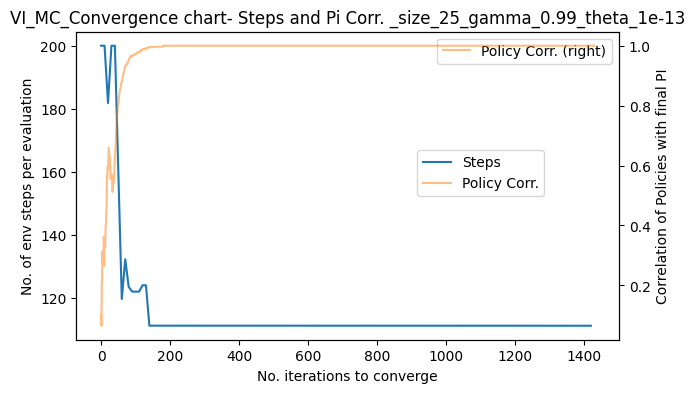

In [1766]:
get_convergence_analysis_on_particular_model_MC(
                              
                              
                                    algo_iter =  'Valu_iter'
                                    ,algo = 'VI'
                                    ,env_name = 'MC'
                                    ,size_ = 25
                                    ,score_ =  'score'#     'steps'
                                    ,steps_ =  'steps'#     'time'
                                    ,time_ =  'time'#     ' score'
                                    ,misc=''

                                    ,save_folder='model_bests_'
                                   ,    selected = 'score' #score
                                     ,range_ =5#10
                                     ,gamma ="0.99",alpha = "0.95", eps = "0.9",
                                     interval = 10,bbox_to_anchor=(0.9, 0.7)


                                  )

## Mountain car :  Q learning best model : size 25, gamma 0.7, alpha 0.95 epsilon 0.9

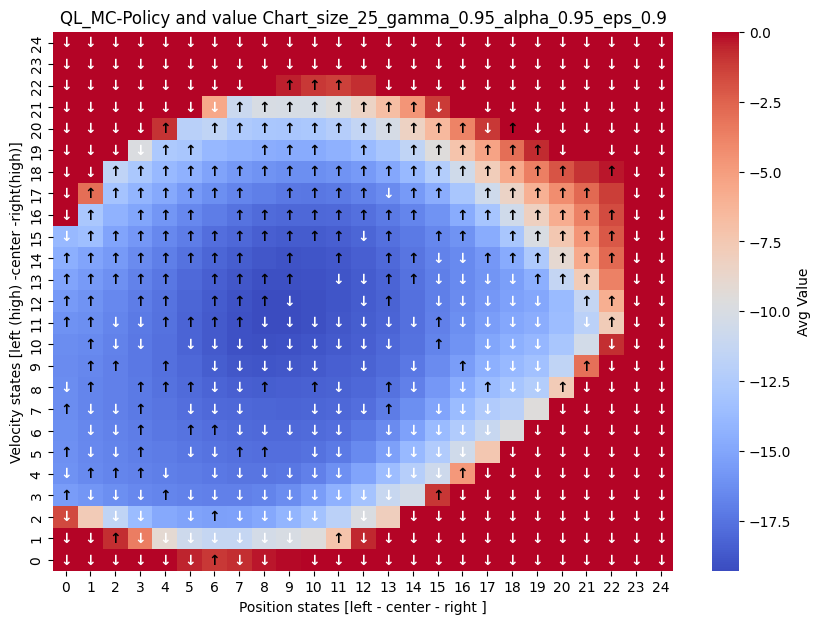

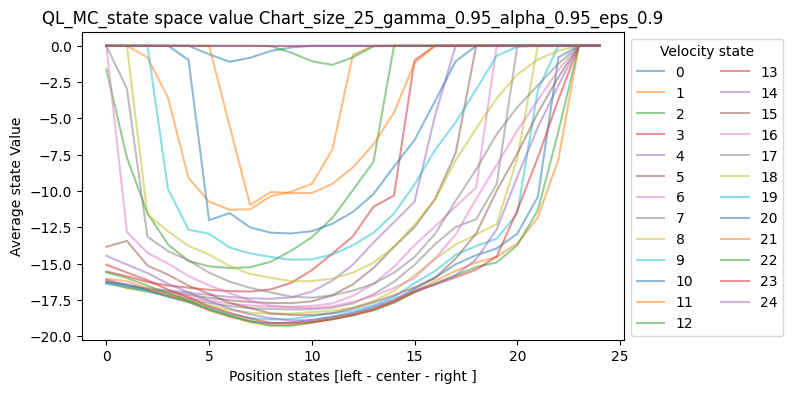

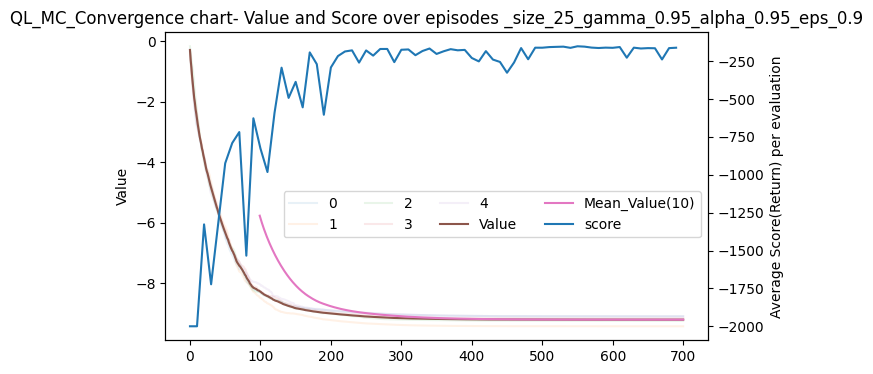

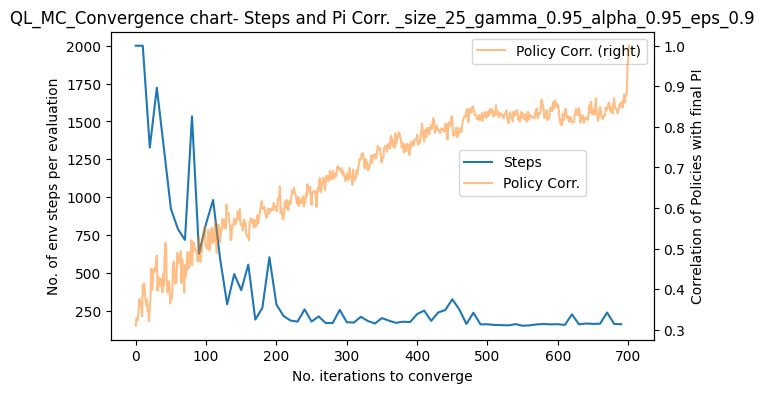

In [1767]:
get_convergence_analysis_on_particular_model_MC(
                              
                              
                                    algo_iter =  'RL_iter'
                                    ,algo = 'QL'
                                    ,env_name = 'MC'
                                    ,size_ = 25
                                    ,score_ =  'score'#     'steps'
                                    ,steps_ =  'steps'#     'time'
                                    ,time_ =  'time'#     ' score'
                                    ,misc=''

                                    ,save_folder='model_bests_'
                                   ,    selected = 'score' #score
                                     ,range_ =5#10
                                     ,gamma ="0.7",alpha = "0.95", eps = "0.9",
                                     interval = 10,bbox_to_anchor=(0.9, 0.5)


                                  )

## Frozen lake :  Q learning best model : size 4, gamma 0.95, alpha 0.7 epsilon 1

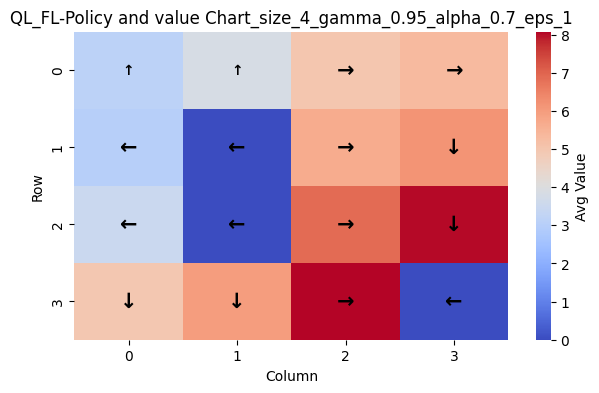

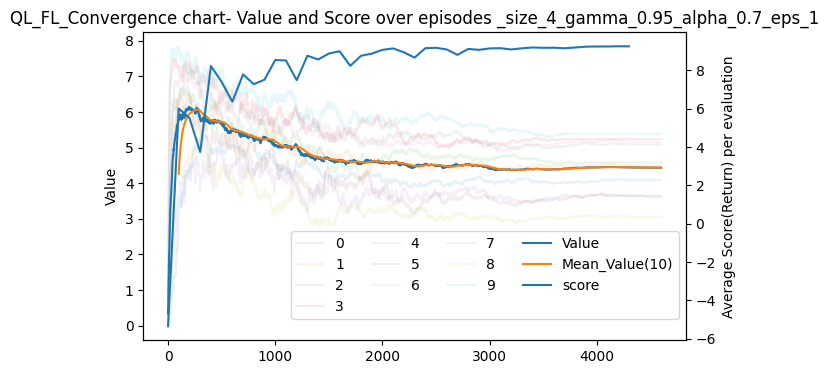

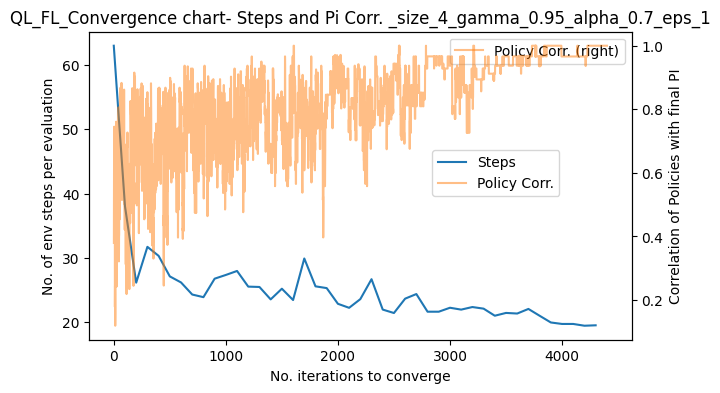

In [1768]:
get_convergence_analysis_on_particular_model_MC(
                              
                              
                                    algo_iter =  'RL_iter'
                                    ,algo = 'QL'
                                    ,env_name = 'FL'
                                    ,size_ = 4#25
                                    ,score_ =     'steps'
                                    ,steps_ =     'time'
                                    ,time_ =    'score'
                                    ,misc=''

                                    ,save_folder='model_bests_'
                                   ,    selected = 'score' #score
                                     ,range_ =10#5#10
                                     ,gamma ="0.95",alpha = "0.7", eps = "1",
                                     interval = 100, bbox_to_anchor=(0.9, 0.4)


                                  )

## Frozen Lake :  Value iteration best model : size 4, gamma 0.99

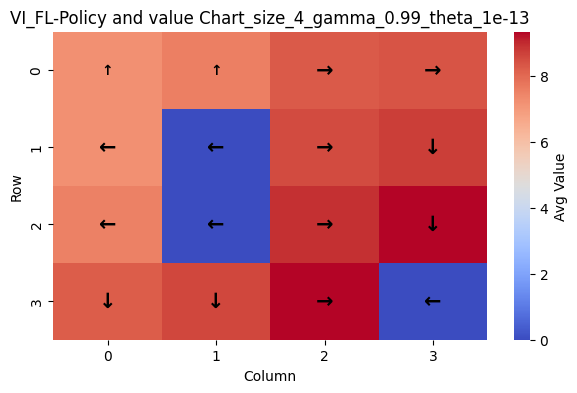

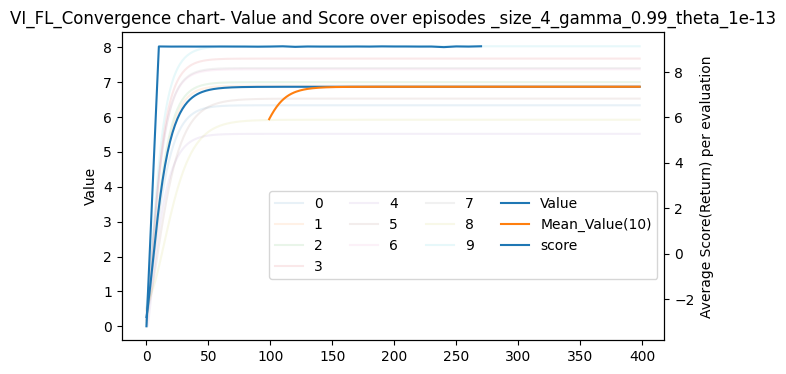

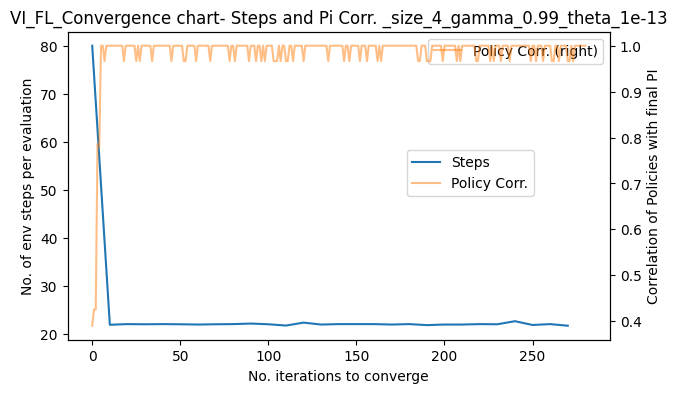

In [1769]:
get_convergence_analysis_on_particular_model_MC(
                              
                              
                                    algo_iter =  'Valu_iter'
                                    ,algo = 'VI'
                                    ,env_name = 'FL'
                                    ,size_ = 4#25
                                    ,score_ =  'steps'
                                    ,steps_ =  'time'
                                    ,time_ =   'score'
                                    ,misc=''

                                    ,save_folder='model_bests_'
                                   ,    selected = 'score' #score
                                     ,range_ =10#5#10
                                     ,gamma ="0.99",alpha = "0.95", eps = "0.9",
                                     interval = 10,bbox_to_anchor=(0.9, 0.5)


                                  )

## Frozen Lake :  Policy iteration best model : size 4, gamma 0.99

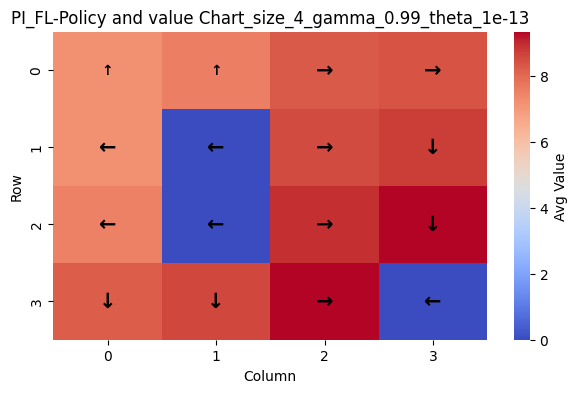

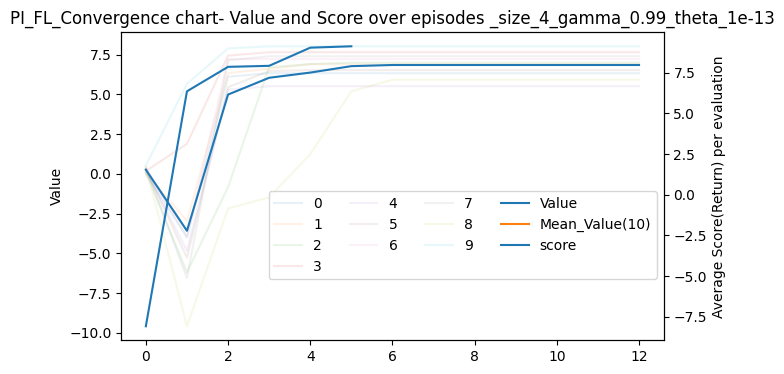

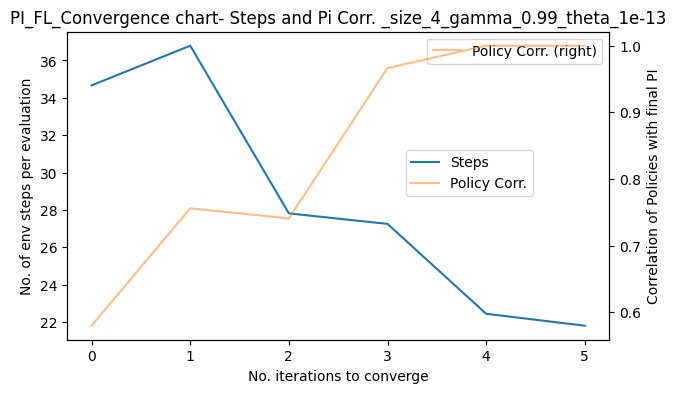

In [1770]:
get_convergence_analysis_on_particular_model_MC(
                              
                              
                                    algo_iter =  'polic_iter'
                                    ,algo = 'PI'
                                    ,env_name = 'FL'
                                    ,size_ = 4#25
                                    ,score_ =    'steps'
                                    ,steps_ =    'time'
                                    ,time_ =   'score'
                                    ,misc=''

                                    ,save_folder='model_bests_'
                                   ,    selected = 'score' #score
                                     ,range_ =10#5#10
                                     ,gamma ="0.99",alpha = "0.95", eps = "0.9",
                                     interval = 1,bbox_to_anchor=(0.9, 0.5)


                                  )